In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp
%matplotlib inline

In [2]:
medium = pd.read_csv('mediumdata.csv')

In [3]:
medium.columns

Index(['audioVersionDurationSec', 'codeBlock', 'codeBlockCount',
       'collectionId', 'createdDate', 'createdDatetime', 'firstPublishedDate',
       'firstPublishedDatetime', 'imageCount', 'isSubscriptionLocked',
       'language', 'latestPublishedDate', 'latestPublishedDatetime',
       'linksCount', 'postId', 'readingTime', 'recommends',
       'responsesCreatedCount', 'socialRecommendsCount', 'subTitle',
       'tagsCount', 'text', 'title', 'totalClapCount', 'uniqueSlug',
       'updatedDate', 'updatedDatetime', 'url', 'vote', 'wordCount',
       'publicationdescription', 'publicationdomain',
       'publicationfacebookPageName', 'publicationfollowerCount',
       'publicationname', 'publicationpublicEmail', 'publicationslug',
       'publicationtags', 'publicationtwitterUsername', 'tag_name', 'slug',
       'name', 'postCount', 'author', 'bio', 'userId', 'userName',
       'usersFollowedByCount', 'usersFollowedCount', 'scrappedDate'],
      dtype='object')

In [4]:
medium.describe()

,audioVersionDurationSec,codeBlockCount,imageCount,linksCount,readingTime,recommends,responsesCreatedCount,socialRecommendsCount,tagsCount,totalClapCount,wordCount,publicationfollowerCount,postCount,usersFollowedByCount,usersFollowedCount,scrappedDate
count,279577.000000,279577.000000,279577.000000,279577.000000,279577.000000,279577.000000,279577.000000,279577.000000,279577.000000,279577.000000,279577.000000,0.0,279577.000000,279577.000000,279577.000000,279577.0
mean,0.588482,1.249255,3.766948,6.869785,4.094117,26.850721,0.948404,0.071537,4.616388,184.963473,936.059633,NaN,43993.910894,1758.680582,309.302046,20181104.0
std,23.817475,7.007749,5.463126,11.962162,3.558776,290.754808,14.910367,0.297759,0.828752,1985.353004,881.097925,NaN,61306.658034,12719.741447,1627.476083,0.0
min,0.000000,0.000000,0.000000,0.000000,0.003774,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,20181104.0
25%,0.000000,0.000000,1.000000,1.000000,1.992453,0.000000,0.000000,0.000000,5.000000,0.000000,427.000000,NaN,2706.000000,10.000000,4.000000,20181104.0
50%,0.000000,0.000000,2.000000,4.000000,3.277673,2.000000,0.000000,0.000000,5.000000,8.000000,735.000000,NaN,23061.000000,63.000000,26.000000,20181104.0
75%,0.000000,0.000000,5.000000,9.000000,5.144340,8.000000,0.000000,0.000000,5.000000,72.000000,1178.000000,NaN,59190.000000,363.000000,136.000000,20181104.0
max,3266.000000,389.000000,263.000000,1180.000000,99.603774,42288.000000,3076.000000,3.000000,6.000000,291706.000000,24964.000000,NaN,331914.000000,333655.000000,85867.000000,20181104.0


In [5]:
cleanmedium = medium.drop(['audioVersionDurationSec', 'codeBlockCount', 'scrappedDate', 'codeBlock', \
                           'createdDate', 'createdDatetime', 'text', 'uniqueSlug', \
                           'vote', 'publicationdescription', 'publicationdomain','publicationfacebookPageName', \
                           'publicationpublicEmail', 'publicationslug','publicationtags', 'publicationtwitterUsername',\
                           'slug', 'author', 'bio', 'userId', 'publicationfollowerCount',\
                           'socialRecommendsCount', 'firstPublishedDate',  'latestPublishedDate', 'updatedDate', \
                           'subTitle', 'name', 'tag_name', 'postCount', 'collectionId', 'updatedDatetime'], axis=1)

In [6]:
cleanmedium.columns

Index(['firstPublishedDatetime', 'imageCount', 'isSubscriptionLocked',
       'language', 'latestPublishedDatetime', 'linksCount', 'postId',
       'readingTime', 'recommends', 'responsesCreatedCount', 'tagsCount',
       'title', 'totalClapCount', 'url', 'wordCount', 'publicationname',
       'userName', 'usersFollowedByCount', 'usersFollowedCount'],
      dtype='object')

In [7]:
cleanmedium.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279577 entries, 0 to 279576
Data columns (total 19 columns):
firstPublishedDatetime     279577 non-null object
imageCount                 279577 non-null int64
isSubscriptionLocked       279577 non-null bool
language                   279577 non-null object
latestPublishedDatetime    279577 non-null object
linksCount                 279577 non-null int64
postId                     279577 non-null object
readingTime                279577 non-null float64
recommends                 279577 non-null int64
responsesCreatedCount      279577 non-null int64
tagsCount                  279577 non-null int64
title                      279572 non-null object
totalClapCount             279577 non-null int64
url                        279577 non-null object
wordCount                  279577 non-null int64
publicationname            137231 non-null object
userName                   279577 non-null object
usersFollowedByCount       279577 non-null floa

In [8]:
cleanmedium.set_index('postId', drop=True, inplace=True)
cleanmedium = cleanmedium.loc[cleanmedium.language == 'en']
cleanmedium = cleanmedium.drop('language', axis=1)
cleanmedium['firstPublishedDatetime'] = pd.to_datetime(cleanmedium['firstPublishedDatetime'])
cleanmedium['latestPublishedDatetime'] = pd.to_datetime(cleanmedium['latestPublishedDatetime'])
cleanmedium.publicationname.fillna(0, inplace=True)
cleanmedium.dropna(inplace=True)
cleanmedium.replace({c: {True: 'Yes', False: 'No'} for c in cleanmedium.select_dtypes([bool])}, inplace=True)

In [9]:
cleanmedium.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257650 entries, 10007d3018fe to fff8e4bd6479
Data columns (total 17 columns):
firstPublishedDatetime     257650 non-null datetime64[ns]
imageCount                 257650 non-null int64
isSubscriptionLocked       257650 non-null object
latestPublishedDatetime    257650 non-null datetime64[ns]
linksCount                 257650 non-null int64
readingTime                257650 non-null float64
recommends                 257650 non-null int64
responsesCreatedCount      257650 non-null int64
tagsCount                  257650 non-null int64
title                      257650 non-null object
totalClapCount             257650 non-null int64
url                        257650 non-null object
wordCount                  257650 non-null int64
publicationname            257650 non-null object
userName                   257650 non-null object
usersFollowedByCount       257650 non-null float64
usersFollowedCount         257650 non-null float64
dtypes: datetim

In [10]:
cleanmedium.describe()

,imageCount,linksCount,readingTime,recommends,responsesCreatedCount,tagsCount,totalClapCount,wordCount,usersFollowedByCount,usersFollowedCount
count,257650.000000,257650.000000,257650.000000,257650.000000,257650.000000,257650.000000,257650.000000,257650.000000,257650.000000,257650.000000
mean,3.712734,6.977679,4.128494,28.651077,1.008857,4.625981,196.532102,955.213107,1885.798277,325.652063
std,5.445275,12.243177,3.570047,302.763663,15.524677,0.826915,2066.882147,888.267398,13240.746847,1692.626120
min,0.000000,0.000000,0.003774,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,2.022642,0.000000,0.000000,5.000000,0.000000,444.000000,10.000000,4.000000
50%,2.000000,4.000000,3.312579,2.000000,0.000000,5.000000,9.000000,750.000000,64.000000,26.000000
75%,5.000000,9.000000,5.180503,9.000000,0.000000,5.000000,77.000000,1197.000000,381.000000,138.000000
max,263.000000,1180.000000,99.603774,42288.000000,3076.000000,6.000000,291706.000000,24964.000000,333655.000000,85867.000000


In [11]:
cleanmedium.head(3)

,firstPublishedDatetime,imageCount,isSubscriptionLocked,latestPublishedDatetime,linksCount,readingTime,recommends,responsesCreatedCount,tagsCount,title,totalClapCount,url,wordCount,publicationname,userName,usersFollowedByCount,usersFollowedCount
postId,,,,,,,,,,,,,,,,,
10007d3018fe,2018-09-18 20:57:03,1,No,2018-09-18 20:58:20,1,0.958491,2,0,5,"Private Business, Government and Blockchain",100,https://medium.com/s/story/private-business-go...,201,ICOBox,babaevanar,450.0,404.0
10007d3018fe,2018-09-18 20:57:03,1,No,2018-09-18 20:58:20,1,0.958491,2,0,5,"Private Business, Government and Blockchain",100,https://medium.com/s/story/private-business-go...,201,ICOBox,babaevanar,450.0,404.0
10007d3018fe,2018-09-18 20:57:03,1,No,2018-09-18 20:58:20,1,0.958491,2,0,5,"Private Business, Government and Blockchain",100,https://medium.com/s/story/private-business-go...,201,ICOBox,babaevanar,450.0,404.0


In [12]:
cleanmedium.drop_duplicates(inplace=True)


In [13]:
cleanmedium.describe()

,imageCount,linksCount,readingTime,recommends,responsesCreatedCount,tagsCount,totalClapCount,wordCount,usersFollowedByCount,usersFollowedCount
count,66379.000000,66379.000000,66379.000000,66379.000000,66379.00000,66379.000000,66379.000000,66379.000000,66379.000000,66379.000000
mean,3.550189,6.606577,3.983773,25.196252,0.90277,4.299929,173.132798,922.508971,1776.941171,297.815077
std,5.399195,11.746198,3.506801,277.393091,14.94077,1.203043,1891.904227,871.067142,13030.049705,1578.252735
min,0.000000,0.000000,0.003774,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.920755,0.000000,0.00000,4.000000,0.000000,421.000000,8.000000,3.000000
50%,2.000000,4.000000,3.180189,2.000000,0.00000,5.000000,6.000000,720.000000,53.000000,22.000000
75%,4.000000,8.000000,5.011792,8.000000,0.00000,5.000000,65.000000,1158.000000,324.000000,127.000000
max,263.000000,1180.000000,99.603774,42288.000000,3076.00000,6.000000,291706.000000,24964.000000,333655.000000,85867.000000


In [14]:
medium_no_outliers = cleanmedium[np.abs(cleanmedium.recommends-cleanmedium.recommends.mean())<=(1.96*cleanmedium.recommends.std())]
medium_outliers = cleanmedium[~(np.abs(cleanmedium.recommends-cleanmedium.recommends.mean())<=(1.96*cleanmedium.recommends.std()))]

In [15]:
medium_no_outliers.shape

(65939, 17)

In [16]:
medium_outliers.shape

(440, 17)

In [17]:
medium_no_outliers.describe()

,imageCount,linksCount,readingTime,recommends,responsesCreatedCount,tagsCount,totalClapCount,wordCount,usersFollowedByCount,usersFollowedCount
count,65939.000000,65939.000000,65939.000000,65939.000000,65939.000000,65939.000000,65939.000000,65939.000000,65939.000000,65939.000000
mean,3.516902,6.497247,3.950513,13.213652,0.525622,4.297002,100.308209,914.545792,1681.940308,295.481354
std,5.353202,10.381663,3.456207,43.478352,2.843405,1.205125,325.327859,858.406678,12744.215104,1571.015792
min,0.000000,0.000000,0.003774,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.913208,0.000000,0.000000,4.000000,0.000000,420.000000,8.000000,3.000000
50%,2.000000,4.000000,3.166038,2.000000,0.000000,5.000000,6.000000,717.000000,52.000000,22.000000
75%,4.000000,8.000000,4.979874,7.000000,0.000000,5.000000,63.000000,1150.000000,314.000000,126.000000
max,263.000000,613.000000,99.603774,567.000000,342.000000,6.000000,10258.000000,24964.000000,333655.000000,85867.000000


In [18]:
cleanmedium = medium_no_outliers 

In [19]:
pp.ProfileReport(cleanmedium)

C:\Users\zvnow\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,18
Number of observations,65939
Total Missing (%),0.0%
Total size in memory,9.1 MiB
Average record size in memory,144.0 B
Numeric,9
Categorical,4
Boolean,0
Date,2
Text (Unique),2
Rejected,1


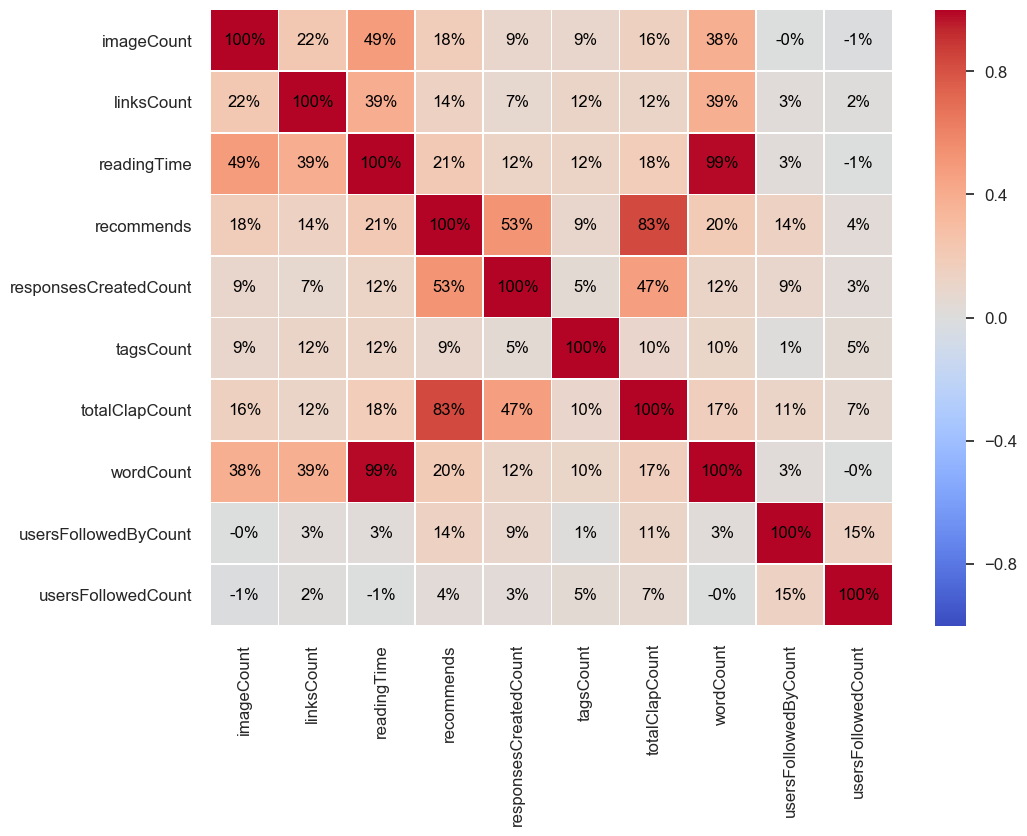

In [20]:
plt.figure(figsize=(11,8))
sns.set(font_scale=1.1)
sns.heatmap(cleanmedium.corr(), linewidth=0.5, cmap='coolwarm',vmin = -1, vmax=1, annot=True, fmt='.0%',\
    annot_kws = {'size': 12, 'color':'black'})
plt.show()

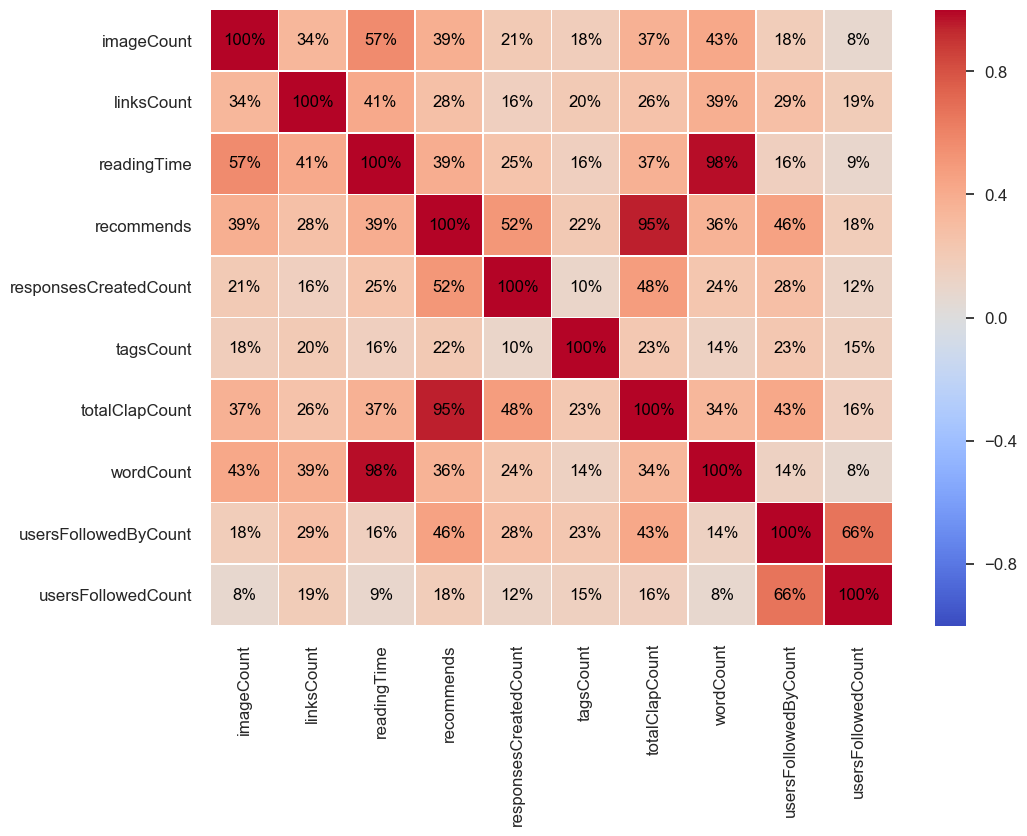

In [21]:
plt.figure(figsize=(11,8))
sns.set(font_scale=1.1)
sns.heatmap(cleanmedium.corr(method='spearman'), linewidth=0.5, cmap='coolwarm',vmin = -1, vmax=1, annot=True, fmt='.0%',\
    annot_kws = {'size': 12, 'color':'black'})
plt.show()

In [22]:
numeric_cols = ['recommends', 'responsesCreatedCount', 'tagsCount', 'wordCount', \
                          'usersFollowedByCount', 'usersFollowedCount']

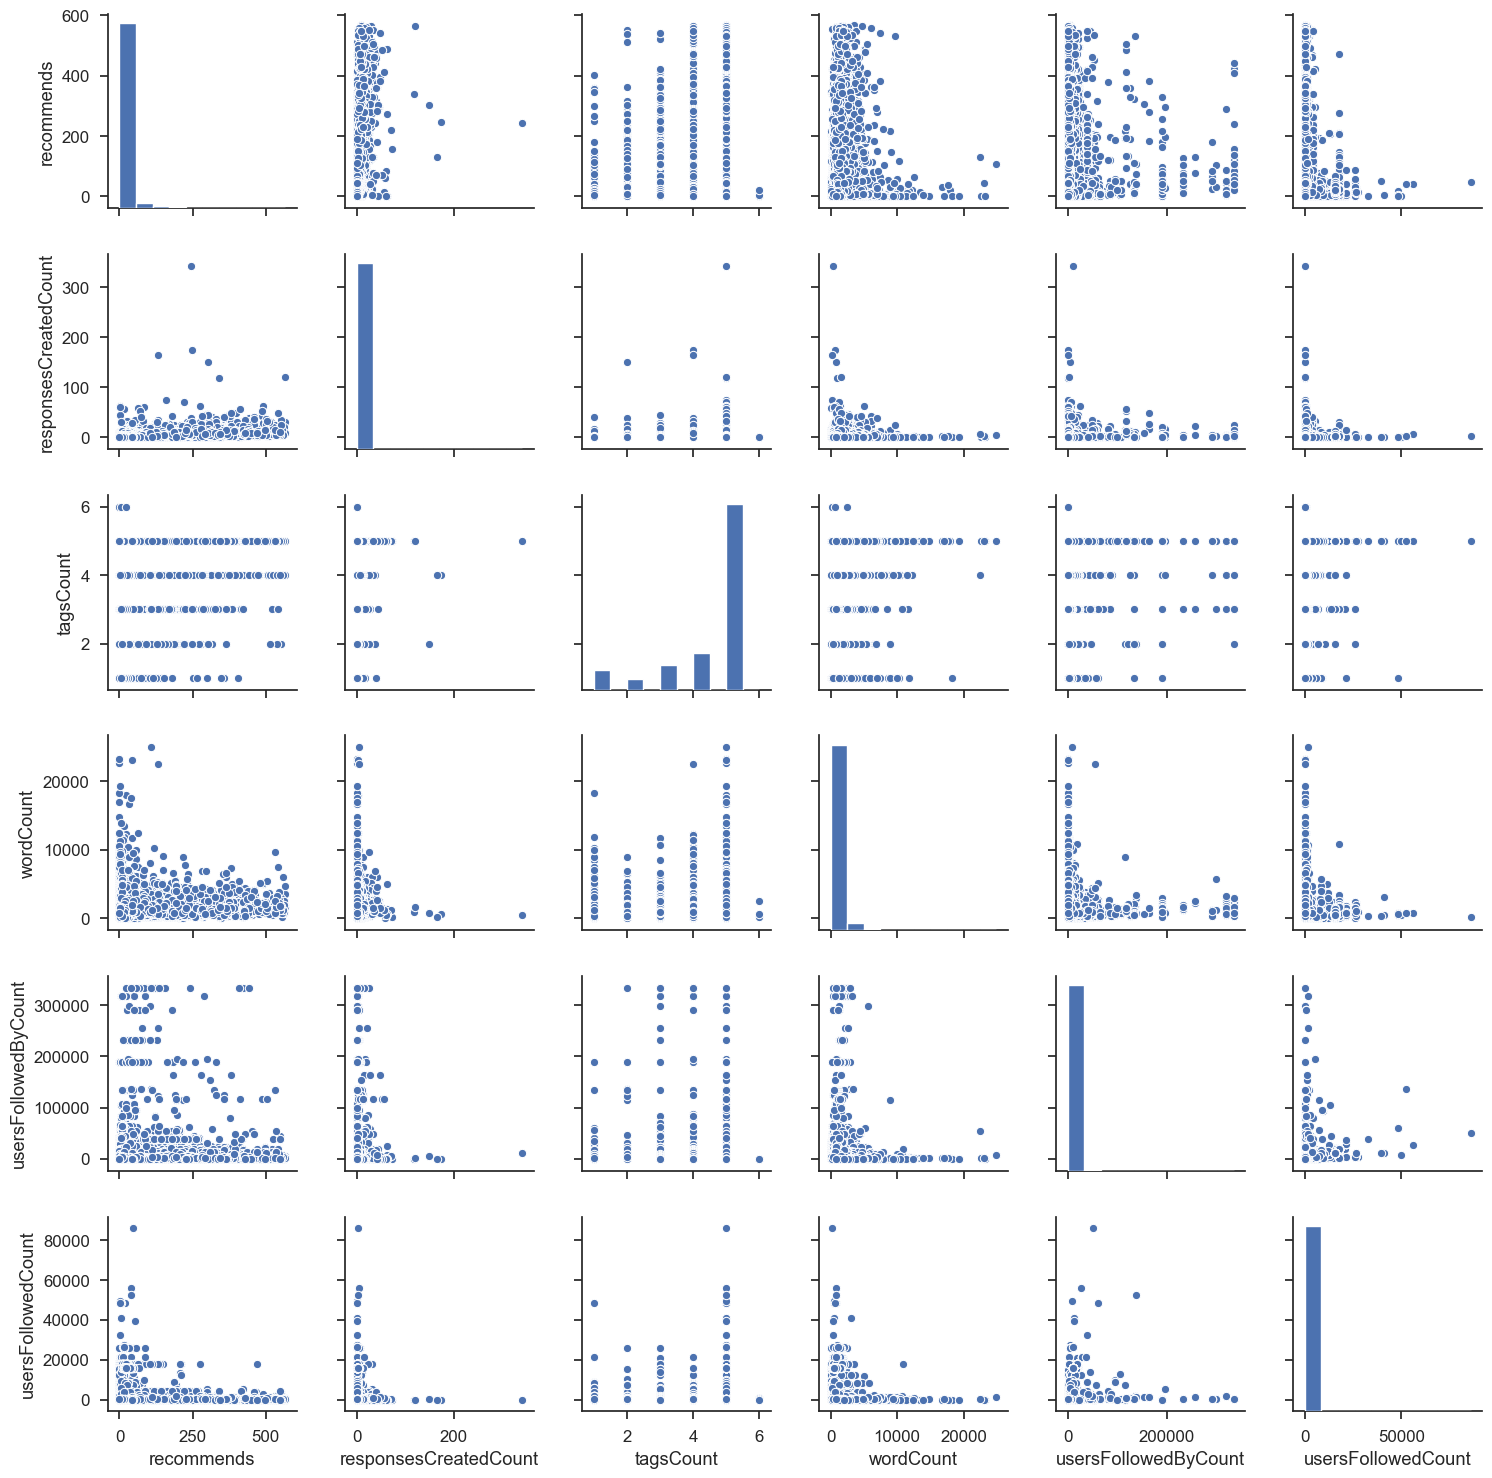

In [23]:
sns.set_style('ticks')
sns.pairplot(cleanmedium[numeric_cols])

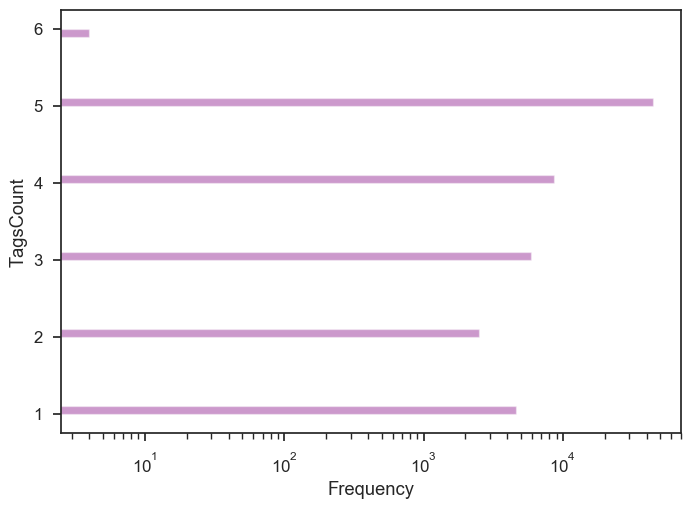

In [24]:
sns.distplot(cleanmedium['tagsCount'], vertical=True, kde=False, color='purple')
plt.ylabel('TagsCount')
plt.xlabel('Frequency')
plt.xscale('log')
plt.show()

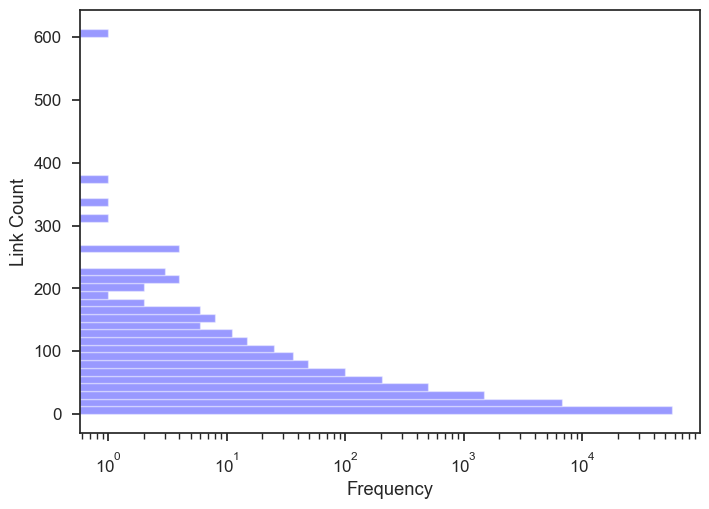

In [25]:
sns.distplot(cleanmedium['linksCount'], vertical=True, kde=False, color='blue')
plt.ylabel('Link Count')
plt.xlabel('Frequency')
plt.xscale('log')
plt.show()

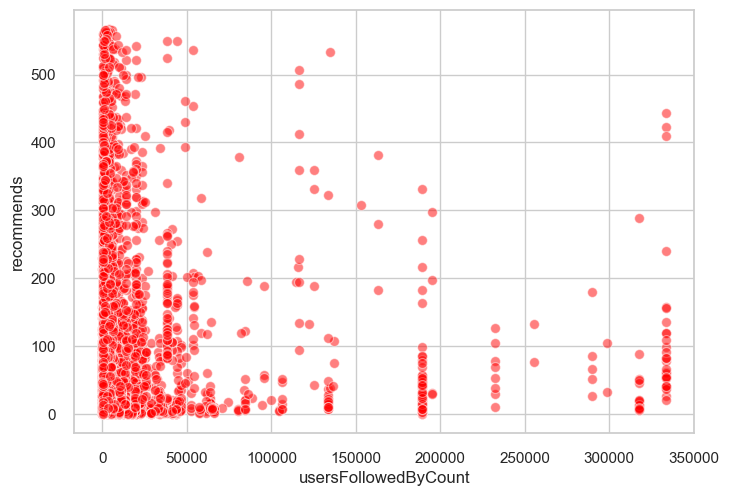

In [26]:
sns.set(font_scale=1, style='whitegrid')
sns.scatterplot(y='recommends', x='usersFollowedByCount', data=cleanmedium, color='red', s=50, alpha=0.5)

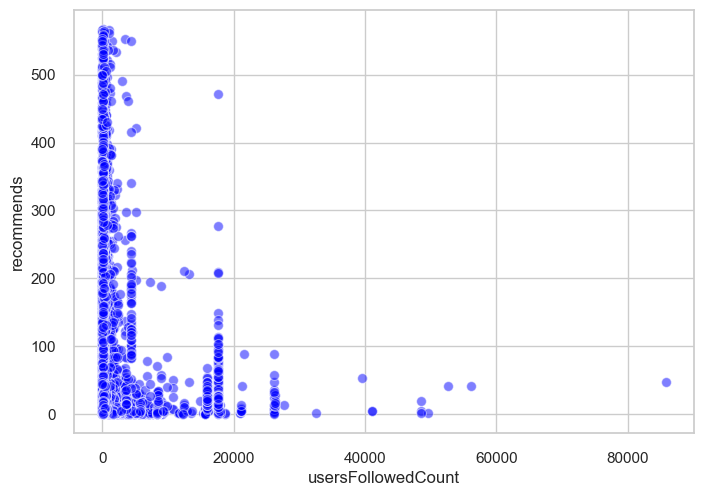

In [27]:
sns.set(font_scale=1, style='whitegrid')
sns.scatterplot(y='recommends', x='usersFollowedCount', data=cleanmedium, color='blue', s=50, alpha=0.5)
plt.show()

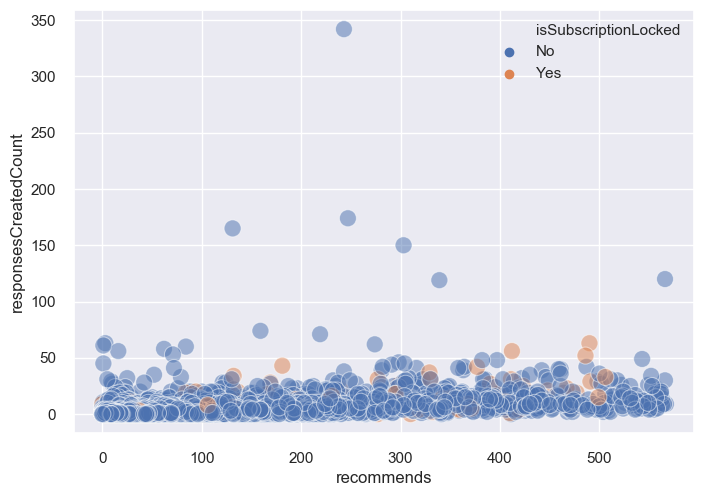

In [28]:
sns.set(font_scale=1)
sns.scatterplot(x='recommends', y='responsesCreatedCount', hue='isSubscriptionLocked', data=cleanmedium, alpha=0.5, s=150)
plt.show()

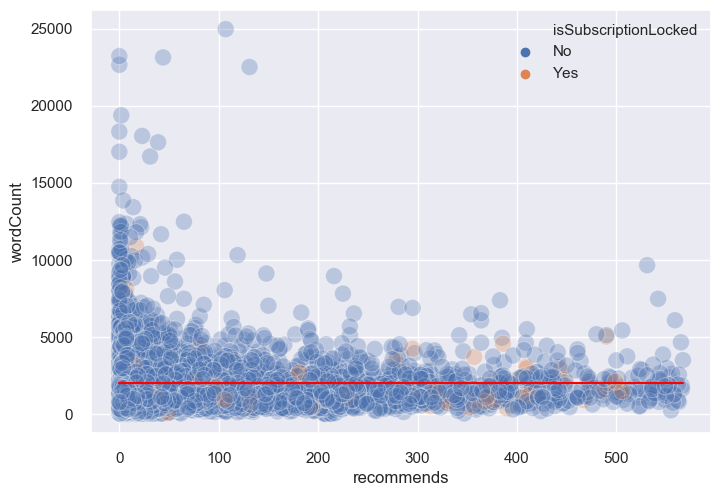

In [29]:
sns.scatterplot(x='recommends', y='wordCount', hue='isSubscriptionLocked', data=cleanmedium, alpha=0.3, s=150)
sns.lineplot(x=cleanmedium['recommends'], y=2000, color='red')
plt.show()

## Research Proposal

#### Problem - Define, Justify, Review:

(1) Define: Often times articles may not receive the maximum number of ‘recommends’ possible.

(2)	Justify: If the articles do not receive the maximum amount of ‘recommends’, they are less likely to be recommended and read by the maximum number of readers. The organization (Medium) receives less traffic and loses the accompanying business benefits when content delivery is not optimized.

(3)	Review: Currently, minimal guidance is publicly given to writers in regard to the optimal article structure required for maximizing 'recommends'.

#### Hypothesis:

(1)	Writing articles that are 2000 words or less will increase the average number of ‘recommends’ or unique users that ‘clap’ for an article.

#### Rollout plan:

A. Conduct t-test on existing Medium article dataset by splitting it into two segments: 

(1)	Articles with 2000 words or less
(2)	Articles with over 2000 words
(3)	Compare mean number of recommends between the two datasets
(4)	Make sure the two subgroups of the total collection of articles are similar in composition for the other numerical attributes (average number of tags, paid to unpaid ratio, follower count, followed count, responses count)

B. Use t-test info to determine if the two groups have a statistically significant difference in number of recommends

(1)	Number of standard deviations from mean above 1.96 (or 2) since sample size is over 100

C. Standard for evaluation of significance: p-value less than 0.05.

### NULL HYP: 

#### There is no statistically significant difference in the number of recommends between articles with 2000 words or less and those with over 2000 words

### Parameters:

#### Metric: 
Average Number of Recommends per unit of Standard Deviation

#### Duration: 
Articles first published between 2010-2018, samples collected over the period between Sept 2017 and Sept 2018.

#### Sample Size: 
65000 articles

#### Sample Composition: 
The data contains all posts tagged AI, Machine Learning, Datascience or Aritificial Intelligence on Medium during the sample period.


### Dataset: https://www.kaggle.com/aiswaryaramachandran/medium-articles-with-content

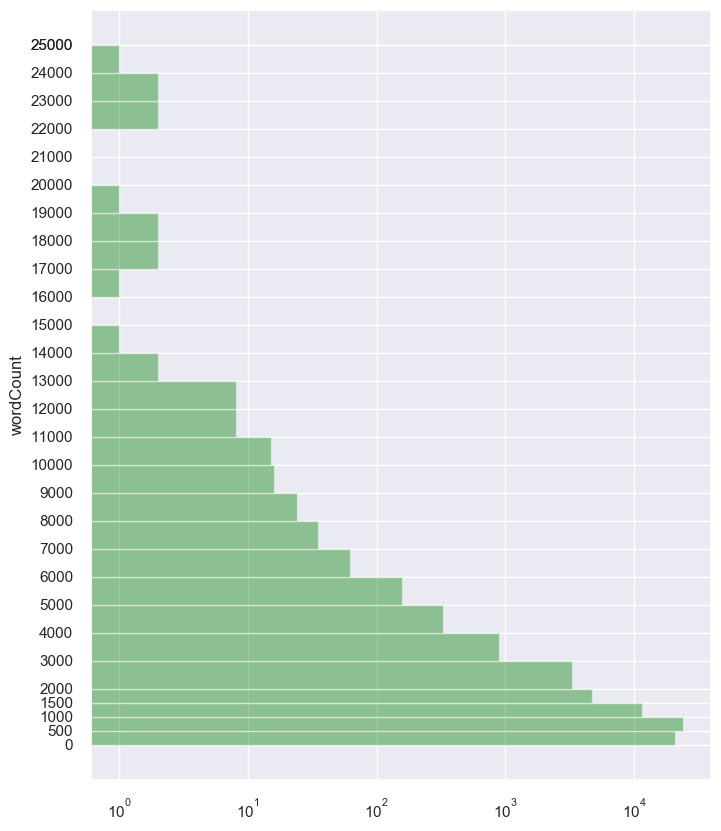

In [30]:
plt.figure(figsize=(8, 10))
sns.set(font_scale=1)
sns.distplot(cleanmedium['wordCount'], kde=False, vertical=True, color='green',bins=[0,500,1000,1500,2000,3000,4000,\
           5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,\
           17000,18000,19000,20000,21000,22000,23000,24000,25000, 25000])
ylabels = [0,500,1000,1500,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,\
           17000,18000,19000,20000,21000,22000,23000,24000,25000, 25000]
plt.yticks(ylabels)
plt.xscale('log')
plt.show()

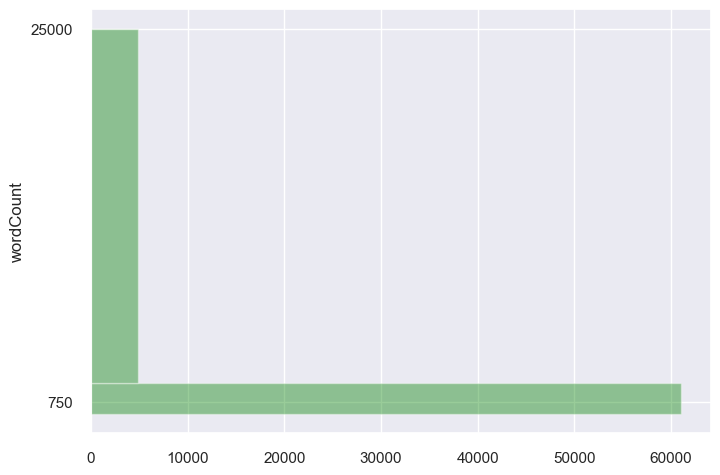

In [31]:
sns.set(font_scale=1)
sns.distplot(cleanmedium['wordCount'], kde=False, vertical=True, color='green',bins=[0,2000, 25000])
ylabels = [750, 25000]
plt.yticks(ylabels)
plt.show()

In [32]:
data1 = cleanmedium.loc[cleanmedium.wordCount <= 2000]
data2 = cleanmedium.loc[cleanmedium.wordCount > 2000]

In [33]:
data1.describe()

,imageCount,linksCount,readingTime,recommends,responsesCreatedCount,tagsCount,totalClapCount,wordCount,usersFollowedByCount,usersFollowedCount
count,61101.000000,61101.000000,61101.000000,61101.000000,61101.000000,61101.000000,61101.000000,61101.000000,61101.000000,61101.000000
mean,3.089704,5.657518,3.272125,11.261681,0.451040,4.277851,87.983159,744.589287,1627.095367,296.731297
std,4.318414,7.766006,1.915814,38.055425,2.725898,1.219575,298.202962,453.282674,12320.101104,1571.418537
min,0.000000,0.000000,0.003774,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.822642,0.000000,0.000000,4.000000,0.000000,398.000000,8.000000,3.000000
50%,2.000000,3.000000,2.969182,2.000000,0.000000,5.000000,5.000000,670.000000,48.000000,22.000000
75%,4.000000,8.000000,4.472956,7.000000,0.000000,5.000000,56.000000,1027.000000,292.000000,124.000000
max,188.000000,229.000000,12.431132,566.000000,342.000000,6.000000,10258.000000,2000.000000,333655.000000,85867.000000


In [34]:
data2.describe()

,imageCount,linksCount,readingTime,recommends,responsesCreatedCount,tagsCount,totalClapCount,wordCount,usersFollowedByCount,usersFollowedCount
count,4838.000000,4838.000000,4838.000000,4838.000000,4838.000000,4838.000000,4838.000000,4838.000000,4838.000000,4838.000000
mean,8.912154,17.102522,12.518146,37.865854,1.467549,4.538859,255.966102,3060.993179,2374.598594,279.695329
std,11.120366,24.207553,6.102734,82.582933,3.923720,0.973092,541.618909,1573.672193,17210.703982,1565.996515
min,0.000000,0.000000,7.566038,0.000000,0.000000,1.000000,0.000000,2001.000000,0.000000,0.000000
25%,2.000000,4.000000,9.326730,1.000000,0.000000,5.000000,3.000000,2240.000000,21.000000,5.000000
50%,6.000000,11.000000,10.730660,7.000000,0.000000,5.000000,53.000000,2586.000000,113.000000,31.000000
75%,12.000000,21.000000,13.436557,30.000000,1.000000,5.000000,232.000000,3267.750000,634.000000,148.000000
max,263.000000,613.000000,99.603774,567.000000,63.000000,6.000000,5499.000000,24964.000000,333655.000000,41130.000000


In [35]:
data1.sort_values('recommends', ascending=False).head(10)

,firstPublishedDatetime,imageCount,isSubscriptionLocked,latestPublishedDatetime,linksCount,readingTime,recommends,responsesCreatedCount,tagsCount,title,totalClapCount,url,wordCount,publicationname,userName,usersFollowedByCount,usersFollowedCount
postId,,,,,,,,,,,,,,,,,
1f047e10c6ab,2018-05-25 16:54:54,6,No,2018-05-30 13:18:25,4,7.082075,566,120,5,"Why Data Scientists Should Write Books, And Wh...",2921,https://towardsdatascience.com/why-data-scient...,1625,Towards Data Science,KirillEremenko,2338.0,1.0
81a165fd0597,2018-02-16 13:41:16,4,No,2018-05-14 12:05:38,13,7.650943,566,30,4,The Tamagotchi Trap,3958,https://medium.com/s/story/on-the-dangers-of-m...,1842,Human Systems,edelwax,5559.0,997.0
702bf2605182,2018-03-19 19:36:05,4,No,2018-06-28 02:54:46,13,3.726415,563,14,5,Using Tensorflow Object Detection to do Pixel ...,3044,https://towardsdatascience.com/using-tensorflo...,802,Towards Data Science,priya.dwivedi,4449.0,19.0
833b48ccc91d,2018-06-10 19:09:09,10,No,2018-10-25 19:58:16,19,8.495283,562,18,5,Python vs (and) R for Data Science,3038,https://blog.usejournal.com/python-vs-and-r-fo...,1920,Noteworthy - The Journal Blog,brianray_7981,806.0,316.0
905a7c367e2a,2017-11-21 18:01:37,7,No,2017-11-22 02:23:02,2,4.359434,562,20,5,How to Explain Your Tech Job to Your Family,2929,https://builttoadapt.io/how-to-explain-your-te...,877,Built to Adapt,mischa,2309.0,1014.0
3db18cce8eb4,2018-02-13 15:08:51,1,No,2018-02-13 22:23:58,15,5.230189,559,9,4,10 things every aspiring data scientist needs ...,2967,https://towardsdatascience.com/10-things-every...,1333,Towards Data Science,ayooluleye,292.0,167.0
c49772cca46c,2018-03-26 15:16:15,12,No,2018-08-02 12:07:19,51,6.157547,558,5,5,11 Javascript Machine Learning Libraries To Us...,3415,https://blog.bitsrc.io/11-javascript-machine-l...,1274,Bits and Pieces,JonathanSaring,2823.0,46.0
bd52d5a9a8b9,2018-08-10 12:41:38,4,No,2018-08-10 12:41:38,4,3.466038,557,15,5,Don’t make this big machine learning mistake: ...,2737,https://towardsdatascience.com/dont-make-this-...,733,Towards Data Science,george.seif94,7781.0,33.0
5ea43d1be3de,2017-10-30 13:40:48,5,No,2017-11-21 14:31:37,4,1.776730,555,4,5,Top 6 Cheat Sheets Novice Machine Learning Eng...,2501,https://medium.com/s/story/top-6-cheat-sheets-...,250,"AI³ | Theory, Practice, Business",cdossman,2227.0,144.0


In [36]:
data2.sort_values('recommends', ascending=False).head(10)

,firstPublishedDatetime,imageCount,isSubscriptionLocked,latestPublishedDatetime,linksCount,readingTime,recommends,responsesCreatedCount,tagsCount,title,totalClapCount,url,wordCount,publicationname,userName,usersFollowedByCount,usersFollowedCount
postId,,,,,,,,,,,,,,,,,
2327ec32c42a,2018-01-08 06:00:49,5,No,2018-01-08 19:36:21,25,14.052201,567,9,5,Functional Data Engineering — a modern paradig...,3238,https://medium.com/s/story/functional-data-eng...,3503,Lyft Engineering,maximebeauchemin,3737.0,102.0
9e2e13d7480d,2018-02-07 10:05:52,22,No,2018-08-17 10:14:18,40,19.427358,565,9,5,How to Use Machine Learning to Predict the Qua...,3294,https://medium.freecodecamp.org/using-machine-...,4658,freeCodeCamp.org,booleanhunter,1235.0,193.0
819b65f074d8,2018-06-07 16:02:46,8,No,2018-06-07 18:24:14,19,10.842767,563,8,5,Reinforcement Learning from scratch,2989,https://blog.insightdatascience.com/reinforcem...,2573,Insight Data,emmanuelameisen,3062.0,8.0
2a70ec6edfd,2018-06-28 19:03:31,9,No,2018-07-25 14:34:06,97,24.173585,559,22,5,An Overview of National AI Strategies,2668,https://medium.com/s/story/an-overview-of-nati...,6088,Politics + AI,tim.a.dutton,970.0,62.0
7c8c8215ac6e,2018-09-17 07:25:47,5,No,2018-10-18 13:59:36,16,10.708805,556,18,5,Building a Simple Chatbot from Scratch in Pyth...,2486,https://medium.com/s/story/building-a-simple-c...,2617,Analytics Vidhya,parulnith,823.0,195.0
601172f7603e,2018-03-13 15:01:02,9,No,2018-05-04 23:21:56,5,10.192453,553,9,2,Listing Embeddings in Search Ranking,2562,https://medium.com/s/story/listing-embeddings-...,2383,Airbnb Engineering & Data Science,mihajlo.grbovic,453.0,1.0
3cd6d244a39c,2018-05-29 15:26:42,11,No,2018-09-18 20:24:03,60,12.556604,551,5,5,How To Create Natural Language Semantic Search...,3241,https://towardsdatascience.com/semantic-code-s...,2983,Towards Data Science,hamelhusain,3797.0,86.0
703f86a231f8,2018-01-18 16:43:11,22,No,2018-06-01 20:49:24,72,16.442453,547,11,5,How To Create Data Products That Are Magical U...,3378,https://towardsdatascience.com/how-to-create-d...,3867,Towards Data Science,hamelhusain,3797.0,86.0
6a6c987f2755,2018-02-01 10:07:36,1,No,2018-09-07 16:23:37,10,8.275472,544,9,5,Python Basics for Data Science,3001,https://towardsdatascience.com/python-basics-f...,2140,Towards Data Science,ventsislav94,290.0,22.0


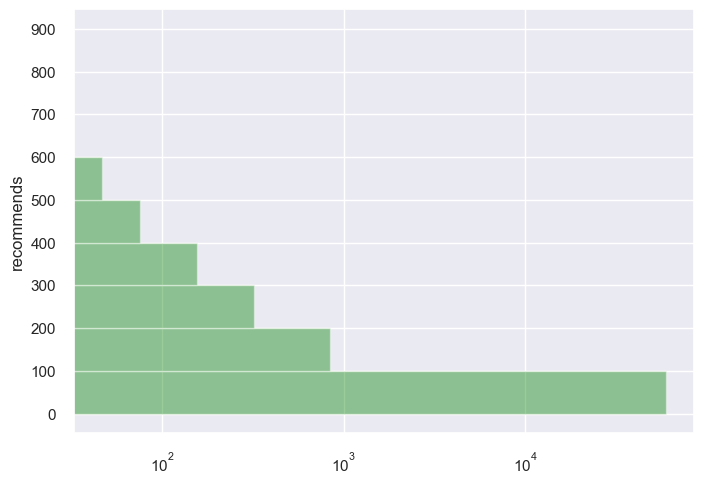

In [37]:
sns.set(font_scale=1)
sns.distplot(data1['recommends'], kde=False, vertical=True, color='green',bins=[0,100,200,300,400,500,600,700, 800, 900])
ylabels = [0,100,200,300,400,500,600,700, 800, 900]
plt.yticks(ylabels)
plt.xscale('log')
plt.show()

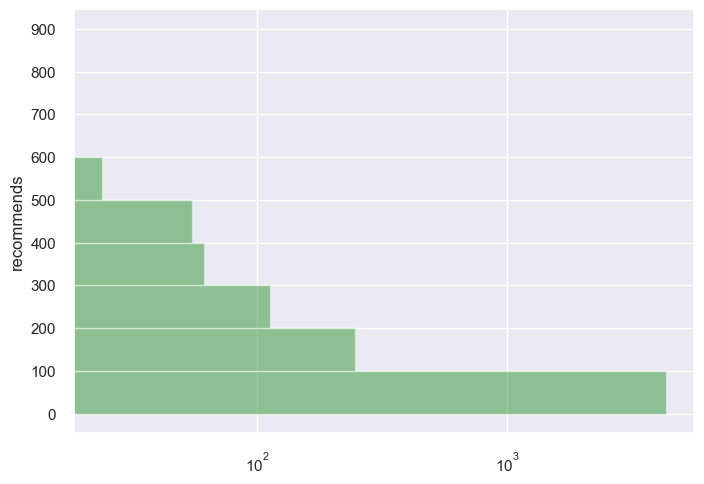

In [38]:
sns.set(font_scale=1)
sns.distplot(data2['recommends'], kde=False, vertical=True, color='green',bins=[0,100,200,300,400,500,600,700, 800, 900])
ylabels = [0,100,200,300,400,500,600,700, 800, 900]
plt.yticks(ylabels)
plt.xscale('log')
plt.show()

In [39]:
under_2000 = data1.sample(2500)
over_2000 = data2.sample(2500)

In [40]:
y1 = np.mean(under_2000.recommends)
y2 = np.mean(over_2000.recommends)
s1 = np.std(under_2000.recommends)
s2 = np.std(over_2000.recommends)
n1 = 2500
n2 = 2500


print('y1 is {}'.format(y1))
print('y2 is {}'.format(y2))
print('s1 is {}'.format(s1))
print('s2 is {}'.format(s2))
print('n1 is {}'.format(n1))
print('n2 is {}'.format(n2))

y1 is 11.7268
y2 is 38.3748
s1 is 40.02631336708391
s2 is 82.2796495189424
n1 is 2500
n2 is 2500


In [41]:
under_2000.describe()

,imageCount,linksCount,readingTime,recommends,responsesCreatedCount,tagsCount,totalClapCount,wordCount,usersFollowedByCount,usersFollowedCount
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,3.052800,6.048000,3.287121,11.726800,0.413600,4.253600,95.718400,750.349600,1291.221600,255.131200
std,4.516876,8.484438,1.937258,40.034321,1.711522,1.238507,339.758554,459.826071,10338.465563,1271.800228
min,0.000000,0.000000,0.030189,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.829953,0.000000,0.000000,4.000000,0.000000,393.000000,7.750000,3.000000
50%,1.000000,3.000000,2.966038,2.000000,0.000000,5.000000,5.000000,675.000000,53.000000,24.000000
75%,4.000000,8.000000,4.503066,7.000000,0.000000,5.000000,58.000000,1036.000000,292.750000,122.000000
max,104.000000,163.000000,9.507547,550.000000,35.000000,5.000000,8542.000000,1993.000000,333655.000000,26089.000000


In [42]:
over_2000.describe()

,imageCount,linksCount,readingTime,recommends,responsesCreatedCount,tagsCount,totalClapCount,wordCount,usersFollowedByCount,usersFollowedCount
count,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000
mean,8.802400,17.346400,12.504541,38.37480,1.434800,4.52920,255.744400,3059.018800,2565.549200,276.337200
std,11.016456,22.873226,6.109101,82.29611,3.731611,0.98343,527.413962,1569.495202,18598.960691,1492.003136
min,0.000000,0.000000,7.566038,0.00000,0.000000,1.00000,0.000000,2001.000000,0.000000,0.000000
25%,2.000000,5.000000,9.316038,1.00000,0.000000,5.00000,3.000000,2241.750000,22.000000,5.000000
50%,6.000000,11.000000,10.694811,7.00000,0.000000,5.00000,54.000000,2579.000000,124.500000,32.500000
75%,12.000000,21.000000,13.469811,31.00000,1.000000,5.00000,236.000000,3279.250000,660.000000,151.250000
max,263.000000,337.000000,99.603774,559.00000,46.000000,5.00000,4332.000000,24964.000000,333655.000000,26328.000000


In [43]:
t_value = (y1-y2) / np.sqrt(((s1**2) / n1) + ((s2**2) / n2))

In [44]:
t_value

-14.561925621144617

In [45]:
from scipy import stats

In [46]:
stats.ttest_ind(under_2000.recommends, over_2000.recommends)

Ttest_indResult(statistic=-14.559012944723612, pvalue=4.650122618405439e-47)

In [47]:
y11 = np.mean(data1.recommends)
y22 = np.mean(data2.recommends)
s11 = np.std(data1.recommends)
s22 = np.std(data2.recommends)

print('y11 is {}'.format(y11))
print('y22 is {}'.format(y22))
print('s11 is {}'.format(s11))
print('s22 is {}'.format(s22))

y11 is 11.261681478208212
y22 is 37.86585365853659
s11 is 38.055113960918575
s22 is 82.5743979611165


In [48]:
R1 = y11/s11

R2 = y22/s22

In [49]:
print('The mean number of recommends per unit of standard deviation for articles with 2000 words or less is {}'.format(R1))
print('The mean number of recommends per unit of standard deviation for articles with over 2000 words is {}'.format(R2))

The mean number of recommends per unit of standard deviation for articles with 2000 words or less is 0.29593083047323443
The mean number of recommends per unit of standard deviation for articles with over 2000 words is 0.45856651206064203


In [50]:
data11 = cleanmedium.loc[cleanmedium.wordCount <= 2000]
data22 = cleanmedium.loc[(cleanmedium.wordCount > 2000) & (cleanmedium.wordCount < 4000)]

In [51]:
data11.describe()

,imageCount,linksCount,readingTime,recommends,responsesCreatedCount,tagsCount,totalClapCount,wordCount,usersFollowedByCount,usersFollowedCount
count,61101.000000,61101.000000,61101.000000,61101.000000,61101.000000,61101.000000,61101.000000,61101.000000,61101.000000,61101.000000
mean,3.089704,5.657518,3.272125,11.261681,0.451040,4.277851,87.983159,744.589287,1627.095367,296.731297
std,4.318414,7.766006,1.915814,38.055425,2.725898,1.219575,298.202962,453.282674,12320.101104,1571.418537
min,0.000000,0.000000,0.003774,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.822642,0.000000,0.000000,4.000000,0.000000,398.000000,8.000000,3.000000
50%,2.000000,3.000000,2.969182,2.000000,0.000000,5.000000,5.000000,670.000000,48.000000,22.000000
75%,4.000000,8.000000,4.472956,7.000000,0.000000,5.000000,56.000000,1027.000000,292.000000,124.000000
max,188.000000,229.000000,12.431132,566.000000,342.000000,6.000000,10258.000000,2000.000000,333655.000000,85867.000000


In [52]:
data22.describe()

,imageCount,linksCount,readingTime,recommends,responsesCreatedCount,tagsCount,totalClapCount,wordCount,usersFollowedByCount,usersFollowedCount
count,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000
mean,8.144226,15.338524,10.772412,37.510062,1.407283,4.540968,250.013656,2609.131529,2396.418304,283.926449
std,8.891971,19.529406,2.046852,80.939468,3.641548,0.961579,511.237097,498.229831,17731.163561,1633.677194
min,0.000000,0.000000,7.566038,0.000000,0.000000,1.000000,0.000000,2001.000000,0.000000,0.000000
25%,2.000000,4.000000,9.160692,2.000000,0.000000,5.000000,4.000000,2202.000000,21.000000,5.000000
50%,6.000000,10.000000,10.283176,7.000000,0.000000,5.000000,54.000000,2466.000000,110.000000,30.000000
75%,11.000000,19.000000,12.001415,31.000000,1.000000,5.000000,236.750000,2914.000000,595.250000,146.000000
max,143.000000,370.000000,18.333019,567.000000,46.000000,6.000000,5499.000000,3990.000000,333655.000000,41130.000000


In [53]:
under_2000_2 = data11.sample(2000)
over_2000_2 = data22.sample(2000)

y111 = np.mean(under_2000_2.recommends)
y222 = np.mean(over_2000_2.recommends)
s111 = np.std(under_2000_2.recommends)
s222 = np.std(over_2000_2.recommends)
n111 = 2000
n222 = 2000


print('y111 is {}'.format(y111))
print('y222 is {}'.format(y222))
print('s111 is {}'.format(s111))
print('s222 is {}'.format(s222))
print('n111 is {}'.format(n111))
print('n222 is {}'.format(n222))

y111 is 10.759
y222 is 38.404
s111 is 36.07558619066362
s222 is 83.34718821891954
n111 is 2000
n222 is 2000


In [54]:
t_value2 = (y111-y222) / np.sqrt(((s111**2) / n111) + ((s222**2) / n222))

In [55]:
t_value2

-13.612940796419236

In [56]:
stats.ttest_ind(under_2000_2.recommends, over_2000_2.recommends)

Ttest_indResult(statistic=-13.609537135709346, pvalue=2.880920888765914e-41)

In [57]:
y1111 = np.mean(data11.recommends)
y2222 = np.mean(data22.recommends)
s1111 = np.std(data11.recommends)
s2222 = np.std(data22.recommends)

print('y1111 is {}'.format(y1111))
print('y2222 is {}'.format(y2222))
print('s1111 is {}'.format(s1111))
print('s2222 is {}'.format(s2222))

R11 = round(y1111/s1111,2)

R22 = round(y2222/s2222,2)

y1111 is 11.261681478208212
y2222 is 37.51006229036895
s1111 is 38.055113960918575
s2222 is 80.92977173682237


In [58]:
print('The mean number of recommends per unit of standard deviation for articles with 2000 words or less is {}'.format(R11))
print('The mean number of recommends per unit of standard deviation for articles with between 2000 and 4000 words is {}'.format(R22))

The mean number of recommends per unit of standard deviation for articles with 2000 words or less is 0.3
The mean number of recommends per unit of standard deviation for articles with between 2000 and 4000 words is 0.46


In [59]:
data1a = cleanmedium.loc[(cleanmedium.wordCount <= 2000) & (cleanmedium.wordCount > 500)]
data2a = cleanmedium.loc[(cleanmedium.wordCount > 2000) & (cleanmedium.wordCount < 3500)]

print('Sample 1 Size is {}'.format(len(data1a)))
print('Sample 2 Size is {}'.format(len(data2a)))

under_2000a = data1a.sample(2000)
over_2000a = data2a.sample(2000)

y1a = np.mean(under_2000a.recommends)
y2a = np.mean(over_2000a.recommends)
s1a = np.std(under_2000a.recommends)
s2a = np.std(over_2000a.recommends)
n1a = 2000
n2a = 2000


print('y1a is {}'.format(y1a))
print('y2a is {}'.format(y2a))
print('s1a is {}'.format(s1a))
print('s2a is {}'.format(s2a))
print('n1a is {}'.format(n1a))
print('n2a is {}'.format(n2a))

Sample 1 Size is 40113
Sample 2 Size is 3855
y1a is 16.918
y2a is 36.823
s1a is 49.69968084404567
s2a is 79.92135303534344
n1a is 2000
n2a is 2000


In [60]:
t_value2a = (y1a-y2a) / np.sqrt(((s1a**2) / n1a) + ((s2a**2) / n2a))
t_value2a

-9.458495604260536

In [61]:
stats.ttest_ind(under_2000a.recommends, over_2000a.recommends)

Ttest_indResult(statistic=-9.456130684707567, pvalue=5.2877364429783844e-21)

In [62]:
y1a1 = np.mean(data1a.recommends)
y2a2 = np.mean(data2a.recommends)
s1a1 = np.std(data1a.recommends)
s2a2 = np.std(data2a.recommends)

print('y1a1 is {}'.format(y1a1))
print('y2a2 is {}'.format(y2a2))
print('s1a1 is {}'.format(s1a1))
print('s2a2 is {}'.format(s2a2))

R11a = round(y1a1/s1a1,2)

R22a = round(y2a2/s2a2,2)

y1a1 is 14.883130157305612
y2a2 is 36.98313878080415
s1a1 is 44.444902305733635
s2a2 is 79.88993060903326


In [63]:
print('The mean number of recommends per unit of standard deviation for articles with between 500 and 2000 words is {}'.format(R11a))
print('The mean number of recommends per unit of standard deviation for articles with between 2000 and 3500 words is {}'.format(R22a))

The mean number of recommends per unit of standard deviation for articles with between 500 and 2000 words is 0.33
The mean number of recommends per unit of standard deviation for articles with between 2000 and 3500 words is 0.46


In [64]:
data1a.describe()

,imageCount,linksCount,readingTime,recommends,responsesCreatedCount,tagsCount,totalClapCount,wordCount,usersFollowedByCount,usersFollowedCount
count,40113.000000,40113.000000,40113.000000,40113.000000,40113.000000,40113.000000,40113.000000,40113.000000,40113.000000,40113.000000
mean,3.764341,6.830080,4.258088,14.883130,0.586019,4.383018,110.408646,982.876349,1907.913943,310.088226
std,4.585500,8.720468,1.589874,44.445456,2.623322,1.133792,312.170617,371.595362,14149.313862,1624.519639
min,0.000000,0.000000,1.890566,0.000000,0.000000,1.000000,0.000000,501.000000,0.000000,0.000000
25%,1.000000,2.000000,2.998428,0.000000,0.000000,4.000000,0.000000,679.000000,9.000000,4.000000
50%,2.000000,5.000000,3.916981,3.000000,0.000000,5.000000,12.000000,897.000000,58.000000,25.000000
75%,5.000000,9.000000,5.248428,9.000000,0.000000,5.000000,81.000000,1214.000000,345.000000,130.000000
max,96.000000,229.000000,12.431132,566.000000,174.000000,6.000000,7681.000000,2000.000000,333655.000000,56114.000000


In [65]:
data2a.describe()

,imageCount,linksCount,readingTime,recommends,responsesCreatedCount,tagsCount,totalClapCount,wordCount,usersFollowedByCount,usersFollowedCount
count,3855.000000,3855.000000,3855.000000,3855.000000,3855.000000,3855.000000,3855.000000,3855.000000,3855.000000,3855.000000
mean,7.971466,14.933852,10.415153,36.983139,1.423606,4.540597,245.793256,2517.070298,2489.409079,289.492348
std,8.738086,19.161971,1.670548,79.900294,3.657681,0.962908,501.678118,395.246003,18408.832773,1680.010975
min,0.000000,0.000000,7.566038,0.000000,0.000000,1.000000,0.000000,2001.000000,0.000000,0.000000
25%,2.000000,4.000000,9.103931,2.000000,0.000000,5.000000,4.000000,2184.000000,21.000000,5.000000
50%,6.000000,10.000000,10.080189,7.000000,0.000000,5.000000,54.000000,2422.000000,113.000000,30.000000
75%,11.000000,19.000000,11.533962,30.500000,1.000000,5.000000,237.000000,2793.000000,598.500000,146.000000
max,143.000000,370.000000,17.650943,563.000000,46.000000,6.000000,5499.000000,3499.000000,333655.000000,41130.000000


In [66]:
x = [1000,1500,2000,2500,3000,3500,4000,4500]

y = [100,200,300,400,500,600,700,800,900,950]

z = [5000,7500,10000,12500,15000,17500,20000,22500,25000]

data_dict = {}
data_dict_full = {}

for b1 in y:
    for b2 in z:
        for a1 in x:
            data1b = cleanmedium.loc[(cleanmedium.wordCount <= a1) & (cleanmedium.wordCount > b1)]
            data2b = cleanmedium.loc[(cleanmedium.wordCount > a1) & (cleanmedium.wordCount <= b2)]
            
            print('data1b has {} entries'.format(len(data1b)))
            print('data2b has {} entries'.format(len(data2b)))
            print('\n')

            under_a = data1b.sample(int(round(min(len(list(data1b.recommends.values)), len(list(data2b.recommends.values))/2),0)))
            over_a = data2b.sample(int(round(min(len(list(data1b.recommends.values)), len(list(data2b.recommends.values))/2),0)))

            ya = np.mean(under_a.recommends)
            yb = np.mean(over_a.recommends)
            sa = np.std(under_a.recommends)
            sb = np.std(over_a.recommends)
            na = len(list(under_a.recommends.values))
            nb = len(list(over_a.recommends.values))

            t_val = round((ya-yb) / np.sqrt(((sa**2) / na) + ((sb**2) / nb)),6)

            print('A word count from {} to {} compared to a word count from {} to {} generated a t-value of {} and stats values of {}'.format\
                 (b1,a1,a1,b2,t_val, stats.ttest_ind(under_a.recommends, over_a.recommends)))
            print('\n')

            yc = np.mean(data1b.recommends)
            yd = np.mean(data2b.recommends)
            sc = np.std(data1b.recommends)
            sd = np.std(data2b.recommends)

            R1y = round(yc/sc,2)

            R2z = round(yd/sd,2)

            print('The mean number of recommends per unit of standard deviation for articles with a word count between {} and {} is {}'.format\
                 (b1,a1,R1y))
            print('\n')
            print('The mean number of recommends per unit of standard deviation for articles with a word count between {} and {} is {}'.format\
                 (a1,b2,R2z))
            print('\n')

            data_dict[t_val] = [b1,a1,b2, R1y, R2z, na]
            data_dict_full[t_val] = [b1,a1,b2, R1y, R2z, na, len(data1b), len(data2b), stats.ttest_ind(under_a.recommends, over_a.recommends)]



data1b has 42468 entries
data2b has 20644 entries


A word count from 100 to 1000 compared to a word count from 1000 to 5000 generated a t-value of -24.520602 and stats values of Ttest_indResult(statistic=-24.519414513121145, pvalue=6.818056879013639e-131)


The mean number of recommends per unit of standard deviation for articles with a word count between 100 and 1000 is 0.27


The mean number of recommends per unit of standard deviation for articles with a word count between 1000 and 5000 is 0.4


data1b has 53890 entries
data2b has 9222 entries


A word count from 100 to 1500 compared to a word count from 1500 to 5000 generated a t-value of -19.75732 and stats values of Ttest_indResult(statistic=-19.755177323472914, pvalue=4.104326395784823e-85)


The mean number of recommends per unit of standard deviation for articles with a word count between 100 and 1500 is 0.29


The mean number of recommends per unit of standard deviation for articles with a word count between 1500 and 5000 is

data1b has 53890 entries
data2b has 9515 entries


A word count from 100 to 1500 compared to a word count from 1500 to 10000 generated a t-value of -19.347992 and stats values of Ttest_indResult(statistic=-19.345958724993938, pvalue=8.119345764633096e-82)


The mean number of recommends per unit of standard deviation for articles with a word count between 100 and 1500 is 0.29


The mean number of recommends per unit of standard deviation for articles with a word count between 1500 and 10000 is 0.44


data1b has 58612 entries
data2b has 4793 entries


A word count from 100 to 2000 compared to a word count from 2000 to 10000 generated a t-value of -13.153241 and stats values of Ttest_indResult(statistic=-13.150496025399388, pvalue=7.901792815479164e-39)


The mean number of recommends per unit of standard deviation for articles with a word count between 100 and 2000 is 0.3


The mean number of recommends per unit of standard deviation for articles with a word count between 2000 and 10000

A word count from 100 to 2000 compared to a word count from 2000 to 15000 generated a t-value of -14.85644 and stats values of Ttest_indResult(statistic=-14.853362190801509, pvalue=7.818087212630015e-49)


The mean number of recommends per unit of standard deviation for articles with a word count between 100 and 2000 is 0.3


The mean number of recommends per unit of standard deviation for articles with a word count between 2000 and 15000 is 0.46


data1b has 60790 entries
data2b has 2649 entries


A word count from 100 to 2500 compared to a word count from 2500 to 15000 generated a t-value of -10.047329 and stats values of Ttest_indResult(statistic=-10.043533660389814, pvalue=2.552364141946914e-23)


The mean number of recommends per unit of standard deviation for articles with a word count between 100 and 2500 is 0.3


The mean number of recommends per unit of standard deviation for articles with a word count between 2500 and 15000 is 0.46


data1b has 61891 entries
data2b has 1548 e

data1b has 60790 entries
data2b has 2655 entries


A word count from 100 to 2500 compared to a word count from 2500 to 20000 generated a t-value of -10.205494 and stats values of Ttest_indResult(statistic=-10.201651324056785, pvalue=5.370842414546577e-24)


The mean number of recommends per unit of standard deviation for articles with a word count between 100 and 2500 is 0.3


The mean number of recommends per unit of standard deviation for articles with a word count between 2500 and 20000 is 0.46


data1b has 61891 entries
data2b has 1554 entries


A word count from 100 to 3000 compared to a word count from 3000 to 20000 generated a t-value of -6.973221 and stats values of Ttest_indResult(statistic=-6.968732126938352, pvalue=4.711355268960805e-12)


The mean number of recommends per unit of standard deviation for articles with a word count between 100 and 3000 is 0.31


The mean number of recommends per unit of standard deviation for articles with a word count between 3000 and 20000 i

A word count from 100 to 4000 compared to a word count from 4000 to 25000 generated a t-value of -4.164268 and stats values of Ttest_indResult(statistic=-4.1579920021511505, pvalue=3.6329181607835375e-05)


The mean number of recommends per unit of standard deviation for articles with a word count between 100 and 4000 is 0.31


The mean number of recommends per unit of standard deviation for articles with a word count between 4000 and 25000 is 0.43


data1b has 62983 entries
data2b has 467 entries


A word count from 100 to 4500 compared to a word count from 4500 to 25000 generated a t-value of -2.549506 and stats values of Ttest_indResult(statistic=-2.5440523253070086, pvalue=0.01127923946267442)


The mean number of recommends per unit of standard deviation for articles with a word count between 100 and 4500 is 0.31


The mean number of recommends per unit of standard deviation for articles with a word count between 4500 and 25000 is 0.43


data1b has 39144 entries
data2b has 20644 e

A word count from 200 to 4500 compared to a word count from 4500 to 7500 generated a t-value of -4.665904 and stats values of Ttest_indResult(statistic=-4.65320766336227, pvalue=4.574935369399379e-06)


The mean number of recommends per unit of standard deviation for articles with a word count between 200 and 4500 is 0.32


The mean number of recommends per unit of standard deviation for articles with a word count between 4500 and 7500 is 0.44


data1b has 39144 entries
data2b has 20937 entries


A word count from 200 to 1000 compared to a word count from 1000 to 10000 generated a t-value of -25.246478 and stats values of Ttest_indResult(statistic=-25.245271858893002, pvalue=1.504318383793554e-138)


The mean number of recommends per unit of standard deviation for articles with a word count between 200 and 1000 is 0.28


The mean number of recommends per unit of standard deviation for articles with a word count between 1000 and 10000 is 0.4


data1b has 50566 entries
data2b has 9515 en

A word count from 200 to 2500 compared to a word count from 2500 to 15000 generated a t-value of -8.803815 and stats values of Ttest_indResult(statistic=-8.800489843989434, pvalue=2.409338636049881e-18)


The mean number of recommends per unit of standard deviation for articles with a word count between 200 and 2500 is 0.31


The mean number of recommends per unit of standard deviation for articles with a word count between 2500 and 15000 is 0.46


data1b has 58567 entries
data2b has 1548 entries


A word count from 200 to 3000 compared to a word count from 3000 to 15000 generated a t-value of -8.189346 and stats values of Ttest_indResult(statistic=-8.184053574050823, pvalue=5.673564645865745e-16)


The mean number of recommends per unit of standard deviation for articles with a word count between 200 and 3000 is 0.31


The mean number of recommends per unit of standard deviation for articles with a word count between 3000 and 15000 is 0.45


data1b has 59143 entries
data2b has 972 ent

A word count from 200 to 4500 compared to a word count from 4500 to 20000 generated a t-value of -3.841864 and stats values of Ttest_indResult(statistic=-3.8335387932092306, pvalue=0.00014389354689636362)


The mean number of recommends per unit of standard deviation for articles with a word count between 200 and 4500 is 0.32


The mean number of recommends per unit of standard deviation for articles with a word count between 4500 and 20000 is 0.42


data1b has 39144 entries
data2b has 20977 entries


A word count from 200 to 1000 compared to a word count from 1000 to 22500 generated a t-value of -24.932356 and stats values of Ttest_indResult(statistic=-24.93116708398426, pvalue=3.172470910188299e-135)


The mean number of recommends per unit of standard deviation for articles with a word count between 200 and 1000 is 0.28


The mean number of recommends per unit of standard deviation for articles with a word count between 1000 and 22500 is 0.4


data1b has 50566 entries
data2b has 955

data1b has 50730 entries
data2b has 4500 entries


A word count from 300 to 2000 compared to a word count from 2000 to 5000 generated a t-value of -13.020158 and stats values of Ttest_indResult(statistic=-13.017263830322163, pvalue=4.716670292730107e-38)


The mean number of recommends per unit of standard deviation for articles with a word count between 300 and 2000 is 0.32


The mean number of recommends per unit of standard deviation for articles with a word count between 2000 and 5000 is 0.46


data1b has 52908 entries
data2b has 2322 entries


A word count from 300 to 2500 compared to a word count from 2500 to 5000 generated a t-value of -7.568713 and stats values of Ttest_indResult(statistic=-7.565452861684419, pvalue=5.536743344501258e-14)


The mean number of recommends per unit of standard deviation for articles with a word count between 300 and 2500 is 0.32


The mean number of recommends per unit of standard deviation for articles with a word count between 2500 and 5000 is 0



A word count from 300 to 4000 compared to a word count from 4000 to 10000 generated a t-value of -5.514496 and stats values of Ttest_indResult(statistic=-5.505594178533747, pvalue=5.399398619974927e-08)


The mean number of recommends per unit of standard deviation for articles with a word count between 300 and 4000 is 0.32


The mean number of recommends per unit of standard deviation for articles with a word count between 4000 and 10000 is 0.44


data1b has 55101 entries
data2b has 422 entries


A word count from 300 to 4500 compared to a word count from 4500 to 10000 generated a t-value of -4.281576 and stats values of Ttest_indResult(statistic=-4.27141824090965, pvalue=2.4044678998906758e-05)


The mean number of recommends per unit of standard deviation for articles with a word count between 300 and 4500 is 0.32


The mean number of recommends per unit of standard deviation for articles with a word count between 4500 and 10000 is 0.43


data1b has 34586 entries
data2b has 20968 


A word count from 300 to 4500 compared to a word count from 4500 to 15000 generated a t-value of -3.711363 and stats values of Ttest_indResult(statistic=-3.703215393676295, pvalue=0.00023908213762260968)


The mean number of recommends per unit of standard deviation for articles with a word count between 300 and 4500 is 0.32


The mean number of recommends per unit of standard deviation for articles with a word count between 4500 and 15000 is 0.42


data1b has 34586 entries
data2b has 20973 entries


A word count from 300 to 1000 compared to a word count from 1000 to 17500 generated a t-value of -23.948357 and stats values of Ttest_indResult(statistic=-23.947215496291555, pvalue=4.7082096155358137e-125)


The mean number of recommends per unit of standard deviation for articles with a word count between 300 and 1000 is 0.29


The mean number of recommends per unit of standard deviation for articles with a word count between 1000 and 17500 is 0.4


data1b has 46008 entries
data2b has 9

A word count from 300 to 2500 compared to a word count from 2500 to 22500 generated a t-value of -9.381454 and stats values of Ttest_indResult(statistic=-9.377921118928557, pvalue=1.3949441590916452e-20)


The mean number of recommends per unit of standard deviation for articles with a word count between 300 and 2500 is 0.32


The mean number of recommends per unit of standard deviation for articles with a word count between 2500 and 22500 is 0.46


data1b has 54009 entries
data2b has 1554 entries


A word count from 300 to 3000 compared to a word count from 3000 to 22500 generated a t-value of -8.010506 and stats values of Ttest_indResult(statistic=-8.005349400124704, pvalue=2.3140765587969403e-15)


The mean number of recommends per unit of standard deviation for articles with a word count between 300 and 3000 is 0.32


The mean number of recommends per unit of standard deviation for articles with a word count between 3000 and 22500 is 0.45


data1b has 54585 entries
data2b has 978 e

The mean number of recommends per unit of standard deviation for articles with a word count between 400 and 2500 is 0.33


The mean number of recommends per unit of standard deviation for articles with a word count between 2500 and 5000 is 0.46


data1b has 48941 entries
data2b has 1221 entries


A word count from 400 to 3000 compared to a word count from 3000 to 5000 generated a t-value of -5.845985 and stats values of Ttest_indResult(statistic=-5.841191155981529, pvalue=6.643141887202732e-09)


The mean number of recommends per unit of standard deviation for articles with a word count between 400 and 3000 is 0.33


The mean number of recommends per unit of standard deviation for articles with a word count between 3000 and 5000 is 0.46


data1b has 49517 entries
data2b has 645 entries


A word count from 400 to 3500 compared to a word count from 3500 to 5000 generated a t-value of -5.119397 and stats values of Ttest_indResult(statistic=-5.111441333942399, pvalue=4.2236850515479016e-07

A word count from 400 to 3500 compared to a word count from 3500 to 10000 generated a t-value of -6.014617 and stats values of Ttest_indResult(statistic=-6.008201857590621, pvalue=2.6835900878498143e-09)


The mean number of recommends per unit of standard deviation for articles with a word count between 400 and 3500 is 0.33


The mean number of recommends per unit of standard deviation for articles with a word count between 3500 and 10000 is 0.45


data1b has 49836 entries
data2b has 619 entries


A word count from 400 to 4000 compared to a word count from 4000 to 10000 generated a t-value of -3.986679 and stats values of Ttest_indResult(statistic=-3.9802440546204405, pvalue=7.702020801808535e-05)


The mean number of recommends per unit of standard deviation for articles with a word count between 400 and 4000 is 0.33


The mean number of recommends per unit of standard deviation for articles with a word count between 4000 and 10000 is 0.44


data1b has 50033 entries
data2b has 422 en

A word count from 400 to 1000 compared to a word count from 1000 to 17500 generated a t-value of -22.521053 and stats values of Ttest_indResult(statistic=-22.51997957601049, pvalue=5.472412507153425e-111)


The mean number of recommends per unit of standard deviation for articles with a word count between 400 and 1000 is 0.3


The mean number of recommends per unit of standard deviation for articles with a word count between 1000 and 17500 is 0.4


data1b has 40940 entries
data2b has 9551 entries


A word count from 400 to 1500 compared to a word count from 1500 to 17500 generated a t-value of -17.120287 and stats values of Ttest_indResult(statistic=-17.118494384050493, pvalue=9.928577415477168e-65)


The mean number of recommends per unit of standard deviation for articles with a word count between 400 and 1500 is 0.31


The mean number of recommends per unit of standard deviation for articles with a word count between 1500 and 17500 is 0.44


data1b has 45662 entries
data2b has 4829 

A word count from 400 to 2500 compared to a word count from 2500 to 22500 generated a t-value of -7.613296 and stats values of Ttest_indResult(statistic=-7.6104294387128455, pvalue=3.770339640318701e-14)


The mean number of recommends per unit of standard deviation for articles with a word count between 400 and 2500 is 0.33


The mean number of recommends per unit of standard deviation for articles with a word count between 2500 and 22500 is 0.46


data1b has 48941 entries
data2b has 1554 entries


A word count from 400 to 3000 compared to a word count from 3000 to 22500 generated a t-value of -6.517841 and stats values of Ttest_indResult(statistic=-6.513644923659614, pvalue=9.882605761575772e-11)


The mean number of recommends per unit of standard deviation for articles with a word count between 400 and 3000 is 0.33


The mean number of recommends per unit of standard deviation for articles with a word count between 3000 and 22500 is 0.45


data1b has 49517 entries
data2b has 978 en

data1b has 44287 entries
data2b has 326 entries


A word count from 500 to 4000 compared to a word count from 4000 to 5000 generated a t-value of -3.696103 and stats values of Ttest_indResult(statistic=-3.684747525179892, pvalue=0.0002682313292666994)


The mean number of recommends per unit of standard deviation for articles with a word count between 500 and 4000 is 0.34


The mean number of recommends per unit of standard deviation for articles with a word count between 4000 and 5000 is 0.46


data1b has 44484 entries
data2b has 129 entries


A word count from 500 to 4500 compared to a word count from 4500 to 5000 generated a t-value of -2.316386 and stats values of Ttest_indResult(statistic=-2.2982176418327334, pvalue=0.023197177594834882)


The mean number of recommends per unit of standard deviation for articles with a word count between 500 and 4500 is 0.34


The mean number of recommends per unit of standard deviation for articles with a word count between 4500 and 5000 is 0.46


A word count from 500 to 2000 compared to a word count from 2000 to 12500 generated a t-value of -11.557213 and stats values of Ttest_indResult(statistic=-11.554817120646716, pvalue=1.753295709738118e-30)


The mean number of recommends per unit of standard deviation for articles with a word count between 500 and 2000 is 0.33


The mean number of recommends per unit of standard deviation for articles with a word count between 2000 and 12500 is 0.46


data1b has 42291 entries
data2b has 2646 entries


A word count from 500 to 2500 compared to a word count from 2500 to 12500 generated a t-value of -8.43254 and stats values of Ttest_indResult(statistic=-8.429352305820943, pvalue=5.629362877317245e-17)


The mean number of recommends per unit of standard deviation for articles with a word count between 500 and 2500 is 0.34


The mean number of recommends per unit of standard deviation for articles with a word count between 2500 and 12500 is 0.46


data1b has 43392 entries
data2b has 1545 e

A word count from 500 to 4000 compared to a word count from 4000 to 17500 generated a t-value of -3.842317 and stats values of Ttest_indResult(statistic=-3.836455614351202, pvalue=0.00013691583437814452)


The mean number of recommends per unit of standard deviation for articles with a word count between 500 and 4000 is 0.34


The mean number of recommends per unit of standard deviation for articles with a word count between 4000 and 17500 is 0.43


data1b has 44484 entries
data2b has 458 entries


A word count from 500 to 4500 compared to a word count from 4500 to 17500 generated a t-value of -3.982534 and stats values of Ttest_indResult(statistic=-3.973829325891229, pvalue=8.219677499939042e-05)


The mean number of recommends per unit of standard deviation for articles with a word count between 500 and 4500 is 0.34


The mean number of recommends per unit of standard deviation for articles with a word count between 4500 and 17500 is 0.42


data1b has 23969 entries
data2b has 20977 e

data1b has 23969 entries
data2b has 20982 entries


A word count from 500 to 1000 compared to a word count from 1000 to 25000 generated a t-value of -22.124006 and stats values of Ttest_indResult(statistic=-22.122951419773585, pvalue=3.1960388995669564e-107)


The mean number of recommends per unit of standard deviation for articles with a word count between 500 and 1000 is 0.3


The mean number of recommends per unit of standard deviation for articles with a word count between 1000 and 25000 is 0.4


data1b has 35391 entries
data2b has 9560 entries


A word count from 500 to 1500 compared to a word count from 1500 to 25000 generated a t-value of -16.988994 and stats values of Ttest_indResult(statistic=-16.98721643776553, pvalue=8.766999700098673e-64)


The mean number of recommends per unit of standard deviation for articles with a word count between 500 and 1500 is 0.32


The mean number of recommends per unit of standard deviation for articles with a word count between 1500 and 2500

The mean number of recommends per unit of standard deviation for articles with a word count between 600 and 3000 is 0.36


The mean number of recommends per unit of standard deviation for articles with a word count between 3000 and 7500 is 0.45


data1b has 38085 entries
data2b has 885 entries


A word count from 600 to 3500 compared to a word count from 3500 to 7500 generated a t-value of -5.642453 and stats values of Ttest_indResult(statistic=-5.636066940081468, pvalue=2.3409153208735733e-08)


The mean number of recommends per unit of standard deviation for articles with a word count between 600 and 3500 is 0.36


The mean number of recommends per unit of standard deviation for articles with a word count between 3500 and 7500 is 0.46


data1b has 38404 entries
data2b has 566 entries


A word count from 600 to 4000 compared to a word count from 4000 to 7500 generated a t-value of -4.066774 and stats values of Ttest_indResult(statistic=-4.059582176643224, pvalue=5.610875030864046e-05)

A word count from 600 to 3500 compared to a word count from 3500 to 12500 generated a t-value of -6.169928 and stats values of Ttest_indResult(statistic=-6.163551025522728, pvalue=1.0433292166241533e-09)


The mean number of recommends per unit of standard deviation for articles with a word count between 600 and 3500 is 0.36


The mean number of recommends per unit of standard deviation for articles with a word count between 3500 and 12500 is 0.45


data1b has 38404 entries
data2b has 650 entries


A word count from 600 to 4000 compared to a word count from 4000 to 12500 generated a t-value of -2.546994 and stats values of Ttest_indResult(statistic=-2.5430727336079886, pvalue=0.011219592113198043)


The mean number of recommends per unit of standard deviation for articles with a word count between 600 and 4000 is 0.36


The mean number of recommends per unit of standard deviation for articles with a word count between 4000 and 12500 is 0.43


data1b has 38601 entries
data2b has 453 ent

data2b has 458 entries


A word count from 600 to 4500 compared to a word count from 4500 to 17500 generated a t-value of -2.214747 and stats values of Ttest_indResult(statistic=-2.2099063227749074, pvalue=0.02760768281536456)


The mean number of recommends per unit of standard deviation for articles with a word count between 600 and 4500 is 0.36


The mean number of recommends per unit of standard deviation for articles with a word count between 4500 and 17500 is 0.42


data1b has 18086 entries
data2b has 20977 entries


A word count from 600 to 1000 compared to a word count from 1000 to 20000 generated a t-value of -20.123953 and stats values of Ttest_indResult(statistic=-20.122993705285197, pvalue=3.227633575596869e-89)


The mean number of recommends per unit of standard deviation for articles with a word count between 600 and 1000 is 0.32


The mean number of recommends per unit of standard deviation for articles with a word count between 1000 and 20000 is 0.4


data1b has 29508 

data1b has 29508 entries
data2b has 9560 entries


A word count from 600 to 1500 compared to a word count from 1500 to 25000 generated a t-value of -15.032008 and stats values of Ttest_indResult(statistic=-15.030435346654679, pvalue=1.7470570557811056e-50)


The mean number of recommends per unit of standard deviation for articles with a word count between 600 and 1500 is 0.34


The mean number of recommends per unit of standard deviation for articles with a word count between 1500 and 25000 is 0.44


data1b has 34230 entries
data2b has 4838 entries


A word count from 600 to 2000 compared to a word count from 2000 to 25000 generated a t-value of -11.178543 and stats values of Ttest_indResult(statistic=-11.176232361392712, pvalue=1.193034557293353e-28)


The mean number of recommends per unit of standard deviation for articles with a word count between 600 and 2000 is 0.35


The mean number of recommends per unit of standard deviation for articles with a word count between 2000 and 250

A word count from 700 to 2500 compared to a word count from 2500 to 7500 generated a t-value of -7.435687 and stats values of Ttest_indResult(statistic=-7.4327843992940155, pvalue=1.441749977603988e-13)


The mean number of recommends per unit of standard deviation for articles with a word count between 700 and 2500 is 0.36


The mean number of recommends per unit of standard deviation for articles with a word count between 2500 and 7500 is 0.46


data1b has 32252 entries
data2b has 1461 entries


A word count from 700 to 3000 compared to a word count from 3000 to 7500 generated a t-value of -5.217129 and stats values of Ttest_indResult(statistic=-5.213554319110851, pvalue=2.118701576830386e-07)


The mean number of recommends per unit of standard deviation for articles with a word count between 700 and 3000 is 0.37


The mean number of recommends per unit of standard deviation for articles with a word count between 3000 and 7500 is 0.45


data1b has 32828 entries
data2b has 885 entrie

The mean number of recommends per unit of standard deviation for articles with a word count between 700 and 3500 is 0.37


The mean number of recommends per unit of standard deviation for articles with a word count between 3500 and 12500 is 0.45


data1b has 33147 entries
data2b has 650 entries


A word count from 700 to 4000 compared to a word count from 4000 to 12500 generated a t-value of -3.554378 and stats values of Ttest_indResult(statistic=-3.5489055292830325, pvalue=0.00041480608416883936)


The mean number of recommends per unit of standard deviation for articles with a word count between 700 and 4000 is 0.37


The mean number of recommends per unit of standard deviation for articles with a word count between 4000 and 12500 is 0.43


data1b has 33344 entries
data2b has 453 entries


A word count from 700 to 4500 compared to a word count from 4500 to 12500 generated a t-value of -2.852617 and stats values of Ttest_indResult(statistic=-2.8462985386096347, pvalue=0.00462520709306

data1b has 33147 entries
data2b has 655 entries


A word count from 700 to 4000 compared to a word count from 4000 to 17500 generated a t-value of -2.235386 and stats values of Ttest_indResult(statistic=-2.231976192131951, pvalue=0.025954469442720434)


The mean number of recommends per unit of standard deviation for articles with a word count between 700 and 4000 is 0.37


The mean number of recommends per unit of standard deviation for articles with a word count between 4000 and 17500 is 0.43


data1b has 33344 entries
data2b has 458 entries


A word count from 700 to 4500 compared to a word count from 4500 to 17500 generated a t-value of -3.576644 and stats values of Ttest_indResult(statistic=-3.5688258606395786, pvalue=0.00039659751069529015)


The mean number of recommends per unit of standard deviation for articles with a word count between 700 and 4500 is 0.37


The mean number of recommends per unit of standard deviation for articles with a word count between 4500 and 17500 is 

A word count from 700 to 2000 compared to a word count from 2000 to 25000 generated a t-value of -9.303066 and stats values of Ttest_indResult(statistic=-9.301142426541832, pvalue=2.0545778769200325e-20)


The mean number of recommends per unit of standard deviation for articles with a word count between 700 and 2000 is 0.36


The mean number of recommends per unit of standard deviation for articles with a word count between 2000 and 25000 is 0.46


data1b has 31151 entries
data2b has 2660 entries


A word count from 700 to 2500 compared to a word count from 2500 to 25000 generated a t-value of -6.303523 and stats values of Ttest_indResult(statistic=-6.301153090743233, pvalue=3.44678813551174e-10)


The mean number of recommends per unit of standard deviation for articles with a word count between 700 and 2500 is 0.36


The mean number of recommends per unit of standard deviation for articles with a word count between 2500 and 25000 is 0.46


data1b has 32252 entries
data2b has 1559 en

data1b has 28295 entries
data2b has 566 entries


A word count from 800 to 4000 compared to a word count from 4000 to 7500 generated a t-value of -2.958977 and stats values of Ttest_indResult(statistic=-2.9537445844232315, pvalue=0.003270341284396966)


The mean number of recommends per unit of standard deviation for articles with a word count between 800 and 4000 is 0.38


The mean number of recommends per unit of standard deviation for articles with a word count between 4000 and 7500 is 0.45


data1b has 28492 entries
data2b has 369 entries


A word count from 800 to 4500 compared to a word count from 4500 to 7500 generated a t-value of -2.519443 and stats values of Ttest_indResult(statistic=-2.512587443589136, pvalue=0.012414185904872052)


The mean number of recommends per unit of standard deviation for articles with a word count between 800 and 4500 is 0.38


The mean number of recommends per unit of standard deviation for articles with a word count between 4500 and 7500 is 0.44



A word count from 800 to 2000 compared to a word count from 2000 to 15000 generated a t-value of -9.334823 and stats values of Ttest_indResult(statistic=-9.332889371007541, pvalue=1.5327111839210084e-20)


The mean number of recommends per unit of standard deviation for articles with a word count between 800 and 2000 is 0.37


The mean number of recommends per unit of standard deviation for articles with a word count between 2000 and 15000 is 0.46


data1b has 26299 entries
data2b has 2649 entries


A word count from 800 to 2500 compared to a word count from 2500 to 15000 generated a t-value of -7.114569 and stats values of Ttest_indResult(statistic=-7.111881373943187, pvalue=1.4669897129901675e-12)


The mean number of recommends per unit of standard deviation for articles with a word count between 800 and 2500 is 0.37


The mean number of recommends per unit of standard deviation for articles with a word count between 2500 and 15000 is 0.46


data1b has 27400 entries
data2b has 1548 

A word count from 800 to 2500 compared to a word count from 2500 to 20000 generated a t-value of -5.545574 and stats values of Ttest_indResult(statistic=-5.543485566776379, pvalue=3.2571862984195154e-08)


The mean number of recommends per unit of standard deviation for articles with a word count between 800 and 2500 is 0.37


The mean number of recommends per unit of standard deviation for articles with a word count between 2500 and 20000 is 0.46


data1b has 27400 entries
data2b has 1554 entries


A word count from 800 to 3000 compared to a word count from 3000 to 20000 generated a t-value of -3.383854 and stats values of Ttest_indResult(statistic=-3.381675664700214, pvalue=0.000738350906914998)


The mean number of recommends per unit of standard deviation for articles with a word count between 800 and 3000 is 0.38


The mean number of recommends per unit of standard deviation for articles with a word count between 3000 and 20000 is 0.45


data1b has 27976 entries
data2b has 978 ent

A word count from 900 to 1000 compared to a word count from 1000 to 5000 generated a t-value of -8.376597 and stats values of Ttest_indResult(statistic=-8.375484154310014, pvalue=6.499731680908565e-17)


The mean number of recommends per unit of standard deviation for articles with a word count between 900 and 1000 is 0.35


The mean number of recommends per unit of standard deviation for articles with a word count between 1000 and 5000 is 0.4


data1b has 15186 entries
data2b has 9222 entries


A word count from 900 to 1500 compared to a word count from 1500 to 5000 generated a t-value of -11.982023 and stats values of Ttest_indResult(statistic=-11.980723699383054, pvalue=7.854740056543234e-33)


The mean number of recommends per unit of standard deviation for articles with a word count between 900 and 1500 is 0.36


The mean number of recommends per unit of standard deviation for articles with a word count between 1500 and 5000 is 0.45


data1b has 19908 entries
data2b has 4500 entri

The mean number of recommends per unit of standard deviation for articles with a word count between 900 and 2000 is 0.38


The mean number of recommends per unit of standard deviation for articles with a word count between 2000 and 10000 is 0.46


data1b has 22086 entries
data2b has 2615 entries


A word count from 900 to 2500 compared to a word count from 2500 to 10000 generated a t-value of -5.813861 and stats values of Ttest_indResult(statistic=-5.81163826380156, pvalue=6.937018031557669e-09)


The mean number of recommends per unit of standard deviation for articles with a word count between 900 and 2500 is 0.39


The mean number of recommends per unit of standard deviation for articles with a word count between 2500 and 10000 is 0.46


data1b has 23187 entries
data2b has 1514 entries


A word count from 900 to 3000 compared to a word count from 3000 to 10000 generated a t-value of -4.689174 and stats values of Ttest_indResult(statistic=-4.686075468379212, pvalue=3.0352105950905632

The mean number of recommends per unit of standard deviation for articles with a word count between 900 and 3000 is 0.39


The mean number of recommends per unit of standard deviation for articles with a word count between 3000 and 15000 is 0.45


data1b has 23763 entries
data2b has 972 entries


A word count from 900 to 3500 compared to a word count from 3500 to 15000 generated a t-value of -3.070337 and stats values of Ttest_indResult(statistic=-3.0671767325846315, pvalue=0.0022208389185479887)


The mean number of recommends per unit of standard deviation for articles with a word count between 900 and 3500 is 0.39


The mean number of recommends per unit of standard deviation for articles with a word count between 3500 and 15000 is 0.45


data1b has 24082 entries
data2b has 653 entries


A word count from 900 to 4000 compared to a word count from 4000 to 15000 generated a t-value of -1.587899 and stats values of Ttest_indResult(statistic=-1.585461715159721, pvalue=0.1133478184227140


A word count from 900 to 3500 compared to a word count from 3500 to 20000 generated a t-value of -4.203928 and stats values of Ttest_indResult(statistic=-4.199627778041616, pvalue=2.918045046584934e-05)


The mean number of recommends per unit of standard deviation for articles with a word count between 900 and 3500 is 0.39


The mean number of recommends per unit of standard deviation for articles with a word count between 3500 and 20000 is 0.45


data1b has 24082 entries
data2b has 659 entries


A word count from 900 to 4000 compared to a word count from 4000 to 20000 generated a t-value of -2.752628 and stats values of Ttest_indResult(statistic=-2.7484544015465855, pvalue=0.006151872057114525)


The mean number of recommends per unit of standard deviation for articles with a word count between 900 and 4000 is 0.39


The mean number of recommends per unit of standard deviation for articles with a word count between 4000 and 20000 is 0.43


data1b has 24279 entries
data2b has 462 ent

data2b has 467 entries


A word count from 900 to 4500 compared to a word count from 4500 to 25000 generated a t-value of -0.474616 and stats values of Ttest_indResult(statistic=-0.4736010076049702, pvalue=0.6360062494414018)


The mean number of recommends per unit of standard deviation for articles with a word count between 900 and 4500 is 0.39


The mean number of recommends per unit of standard deviation for articles with a word count between 4500 and 25000 is 0.43


data1b has 1801 entries
data2b has 20644 entries


A word count from 950 to 1000 compared to a word count from 1000 to 5000 generated a t-value of -6.63306 and stats values of Ttest_indResult(statistic=-6.631218344243521, pvalue=3.8265438320858064e-11)


The mean number of recommends per unit of standard deviation for articles with a word count between 950 and 1000 is 0.37


The mean number of recommends per unit of standard deviation for articles with a word count between 1000 and 5000 is 0.4


data1b has 13223 entrie

A word count from 950 to 1000 compared to a word count from 1000 to 10000 generated a t-value of -6.792625 and stats values of Ttest_indResult(statistic=-6.790738805843599, pvalue=1.2996947405291911e-11)


The mean number of recommends per unit of standard deviation for articles with a word count between 950 and 1000 is 0.37


The mean number of recommends per unit of standard deviation for articles with a word count between 1000 and 10000 is 0.4


data1b has 13223 entries
data2b has 9515 entries


A word count from 950 to 1500 compared to a word count from 1500 to 10000 generated a t-value of -11.862365 and stats values of Ttest_indResult(statistic=-11.86111840938027, pvalue=3.1770396530182007e-32)


The mean number of recommends per unit of standard deviation for articles with a word count between 950 and 1500 is 0.37


The mean number of recommends per unit of standard deviation for articles with a word count between 1500 and 10000 is 0.44


data1b has 17945 entries
data2b has 4793 

A word count from 950 to 1500 compared to a word count from 1500 to 15000 generated a t-value of -11.00445 and stats values of Ttest_indResult(statistic=-11.003297386597012, pvalue=5.424786558076058e-28)


The mean number of recommends per unit of standard deviation for articles with a word count between 950 and 1500 is 0.37


The mean number of recommends per unit of standard deviation for articles with a word count between 1500 and 15000 is 0.44


data1b has 17945 entries
data2b has 4827 entries


A word count from 950 to 2000 compared to a word count from 2000 to 15000 generated a t-value of -8.889594 and stats values of Ttest_indResult(statistic=-8.887752159474132, pvalue=8.654877518290611e-19)


The mean number of recommends per unit of standard deviation for articles with a word count between 950 and 2000 is 0.38


The mean number of recommends per unit of standard deviation for articles with a word count between 2000 and 15000 is 0.46


data1b has 20123 entries
data2b has 2649 e

A word count from 950 to 2000 compared to a word count from 2000 to 20000 generated a t-value of -7.398631 and stats values of Ttest_indResult(statistic=-7.397099564531208, pvalue=1.6324335599732153e-13)


The mean number of recommends per unit of standard deviation for articles with a word count between 950 and 2000 is 0.38


The mean number of recommends per unit of standard deviation for articles with a word count between 2000 and 20000 is 0.46


data1b has 20123 entries
data2b has 2655 entries


A word count from 950 to 2500 compared to a word count from 2500 to 20000 generated a t-value of -6.641298 and stats values of Ttest_indResult(statistic=-6.638796997188053, pvalue=3.820975776427733e-11)


The mean number of recommends per unit of standard deviation for articles with a word count between 950 and 2500 is 0.39


The mean number of recommends per unit of standard deviation for articles with a word count between 2500 and 20000 is 0.46


data1b has 21224 entries
data2b has 1554 e

A word count from 950 to 4000 compared to a word count from 4000 to 25000 generated a t-value of -1.967544 and stats values of Ttest_indResult(statistic=-1.964578987071529, pvalue=0.049880865427469716)


The mean number of recommends per unit of standard deviation for articles with a word count between 950 and 4000 is 0.4


The mean number of recommends per unit of standard deviation for articles with a word count between 4000 and 25000 is 0.43


data1b has 22316 entries
data2b has 467 entries


A word count from 950 to 4500 compared to a word count from 4500 to 25000 generated a t-value of -1.379456 and stats values of Ttest_indResult(statistic=-1.3765048018631145, pvalue=0.16932641662401646)


The mean number of recommends per unit of standard deviation for articles with a word count between 950 and 4500 is 0.4


The mean number of recommends per unit of standard deviation for articles with a word count between 4500 and 25000 is 0.43




In [67]:
data_dict

{-24.520602: [100, 1000, 5000, 0.27, 0.4, 10322],
 -19.75732: [100, 1500, 5000, 0.29, 0.45, 4611],
 -14.429249: [100, 2000, 5000, 0.3, 0.46, 2250],
 -9.347004: [100, 2500, 5000, 0.3, 0.46, 1161],
 -7.087682: [100, 3000, 5000, 0.31, 0.46, 610],
 -6.363867: [100, 3500, 5000, 0.31, 0.47, 322],
 -2.670666: [100, 4000, 5000, 0.31, 0.46, 163],
 -1.959529: [100, 4500, 5000, 0.31, 0.46, 64],
 -25.609106: [100, 1000, 7500, 0.27, 0.4, 10442],
 -19.620261: [100, 1500, 7500, 0.29, 0.44, 4731],
 -14.017987: [100, 2000, 7500, 0.3, 0.46, 2370],
 -10.362833: [100, 2500, 7500, 0.3, 0.46, 1281],
 -6.066011: [100, 3000, 7500, 0.31, 0.45, 730],
 -5.901796: [100, 3500, 7500, 0.31, 0.46, 442],
 -5.916981: [100, 4000, 7500, 0.31, 0.45, 283],
 -4.001142: [100, 4500, 7500, 0.31, 0.44, 184],
 -25.82898: [100, 1000, 10000, 0.27, 0.4, 10468],
 -19.347992: [100, 1500, 10000, 0.29, 0.44, 4758],
 -13.153241: [100, 2000, 10000, 0.3, 0.46, 2396],
 -8.878209: [100, 2500, 10000, 0.3, 0.46, 1308],
 -8.287399: [100, 3000,

In [68]:
t_values_df = pd.DataFrame(data_dict.values(), index=data_dict.keys(),\
                 columns=['Lower Bound', 'Middle Bound', 'Upper Bound', 'REC/STD1', 'REC/STD1', 'Sample Size'])
t_values_df.index.name = 'T-Value'

In [69]:
t_values_df

,Lower Bound,Middle Bound,Upper Bound,REC/STD1,REC/STD1,Sample Size
T-Value,,,,,,
-24.520602,100,1000,5000,0.27,0.40,10322
-19.757320,100,1500,5000,0.29,0.45,4611
-14.429249,100,2000,5000,0.30,0.46,2250
-9.347004,100,2500,5000,0.30,0.46,1161
-7.087682,100,3000,5000,0.31,0.46,610
...,...,...,...,...,...,...
-6.128753,950,2500,25000,0.39,0.46,1330
-3.568096,950,3000,25000,0.39,0.45,780
-4.724731,950,3500,25000,0.40,0.45,492


In [70]:
t_values_df.sort_values('T-Value').tail(50)

,Lower Bound,Middle Bound,Upper Bound,REC/STD1,REC/STD1,Sample Size
T-Value,,,,,,
-2.626445,800,4500,25000,0.38,0.43,234
-2.616553,600,4500,5000,0.36,0.46,64
-2.599710,500,4500,12500,0.34,0.43,226
-2.599436,800,3500,15000,0.38,0.45,486
-2.575827,950,3500,5000,0.40,0.47,322
-2.565273,800,3500,5000,0.38,0.47,322
-2.549506,100,4500,25000,0.31,0.43,234
-2.546994,600,4000,12500,0.36,0.43,325
-2.519443,800,4500,7500,0.38,0.44,184


In [71]:
t_values_df.sort_values('T-Value').head(50)

,Lower Bound,Middle Bound,Upper Bound,REC/STD1,REC/STD1,Sample Size
T-Value,,,,,,
-27.007484,100,1000,22500,0.27,0.4,10488
-26.894073,100,1000,20000,0.27,0.4,10488
-26.461436,200,1000,17500,0.28,0.4,10486
-26.366390,100,1000,17500,0.27,0.4,10486
-25.922094,100,1000,12500,0.27,0.4,10484
-25.828980,100,1000,10000,0.27,0.4,10468
-25.683841,100,1000,25000,0.27,0.4,10491
-25.658891,200,1000,20000,0.28,0.4,10488
-25.609106,100,1000,7500,0.27,0.4,10442


In [72]:
t_values_df.describe()

,Lower Bound,Middle Bound,Upper Bound,REC/STD1,REC/STD1,Sample Size
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,545.000000,2750.000000,15000.000000,0.341875,0.441528,2354.837500
std,279.881755,1146.440339,6459.459538,0.032430,0.019780,2986.628226
min,100.000000,1000.000000,5000.000000,0.270000,0.400000,64.000000
25%,300.000000,1875.000000,10000.000000,0.320000,0.430000,331.500000
50%,550.000000,2750.000000,15000.000000,0.340000,0.450000,970.500000
75%,800.000000,3625.000000,20000.000000,0.370000,0.460000,2419.000000
max,950.000000,4500.000000,25000.000000,0.400000,0.470000,10491.000000


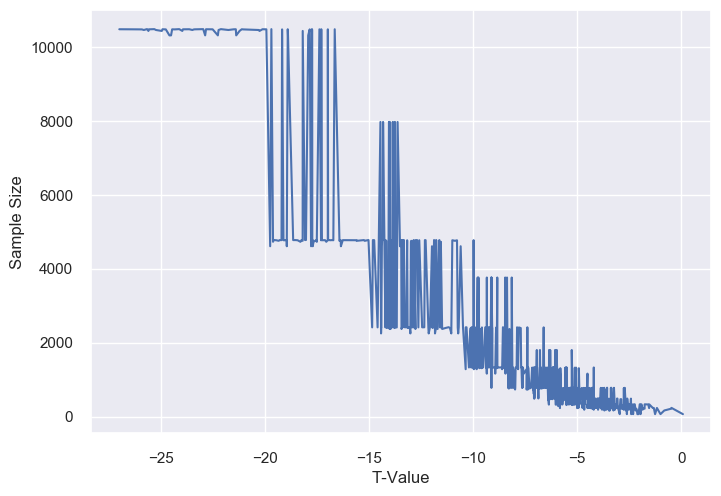

In [73]:
sns.lineplot(x=t_values_df.index, y=t_values_df['Sample Size'])

(-10, 0)

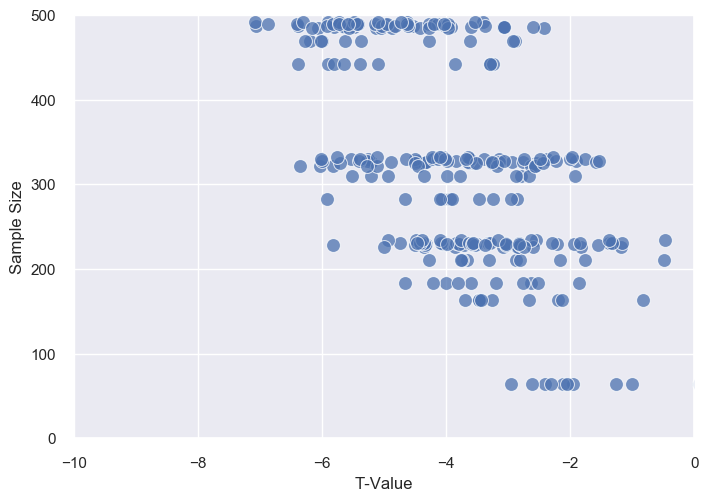

In [74]:
sns.scatterplot(x=t_values_df.index, y=t_values_df['Sample Size'], s=100, alpha=0.75)
plt.ylim(0,500)
plt.xlim(-10,0)

(-3, 0)

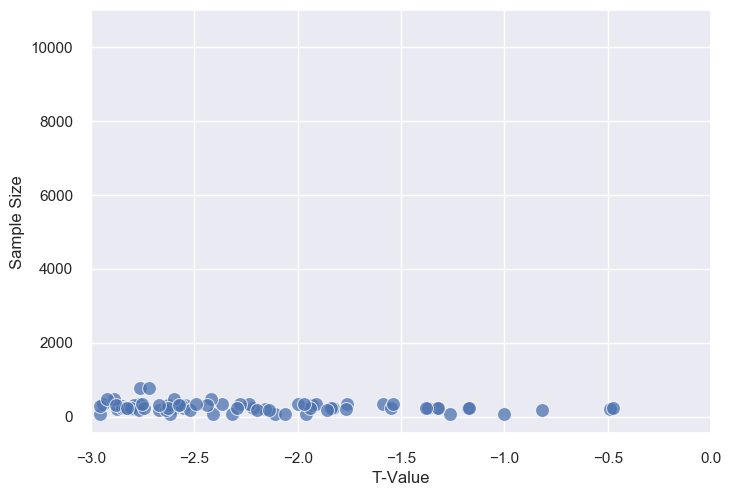

In [75]:
sns.scatterplot(x=t_values_df.index, y=t_values_df['Sample Size'], s=100, alpha=0.75)
plt.xlim(-3,0)

In [76]:
t_values_df[abs(t_values_df.index) <= 3].describe()

,Lower Bound,Middle Bound,Upper Bound,REC/STD1,REC/STD1,Sample Size
count,75.000000,75.0000,75.000000,75.000000,75.000000,75.000000
mean,736.000000,4200.0000,13166.666667,0.373867,0.438800,257.200000
std,241.694469,385.5498,6682.132960,0.026503,0.015064,131.912645
min,100.000000,3000.0000,5000.000000,0.310000,0.420000,64.000000
25%,600.000000,4000.0000,7500.000000,0.360000,0.430000,211.000000
50%,800.000000,4500.0000,12500.000000,0.380000,0.430000,231.000000
75%,950.000000,4500.0000,18750.000000,0.390000,0.450000,325.500000
max,950.000000,4500.0000,25000.000000,0.400000,0.470000,777.000000


In [77]:
t_values_df[abs(t_values_df.index) <= 3].sort_values('T-Value').tail(36)

,Lower Bound,Middle Bound,Upper Bound,REC/STD1,REC/STD1,Sample Size
T-Value,,,,,,
-2.316386,500,4500,5000,0.34,0.46,64
-2.294258,900,4500,22500,0.39,0.42,231
-2.279941,800,4000,25000,0.38,0.43,332
-2.235386,700,4000,17500,0.37,0.43,328
-2.214747,600,4500,17500,0.36,0.42,229
-2.198618,800,4000,5000,0.38,0.46,163
-2.160079,600,4500,10000,0.36,0.43,211
-2.137082,900,4000,5000,0.39,0.46,163
-2.111038,200,4500,5000,0.32,0.46,64


In [78]:
t_values_df[abs(t_values_df.index) <= 3].sort_values('T-Value').head(36)

,Lower Bound,Middle Bound,Upper Bound,REC/STD1,REC/STD1,Sample Size
T-Value,,,,,,
-2.959146,300,4500,5000,0.32,0.46,64
-2.958977,800,4000,7500,0.38,0.45,283
-2.942791,300,4000,15000,0.32,0.43,326
-2.925278,950,3500,10000,0.40,0.45,469
-2.888014,900,3500,10000,0.39,0.45,469
-2.877549,950,4000,10000,0.40,0.44,310
-2.873332,200,4500,10000,0.32,0.43,211
-2.852757,300,4000,7500,0.32,0.45,283
-2.852617,700,4500,12500,0.37,0.43,226


In [79]:
t_values_df[t_values_df['Sample Size'] <= 100].describe()

,Lower Bound,Middle Bound,Upper Bound,REC/STD1,REC/STD1,Sample Size
count,10.000000,10.0,10.0,10.000000,1.000000e+01,10.0
mean,545.000000,4500.0,5000.0,0.352000,4.600000e-01,64.0
std,294.816327,0.0,0.0,0.032249,5.851389e-17,0.0
min,100.000000,4500.0,5000.0,0.310000,4.600000e-01,64.0
25%,325.000000,4500.0,5000.0,0.322500,4.600000e-01,64.0
50%,550.000000,4500.0,5000.0,0.350000,4.600000e-01,64.0
75%,775.000000,4500.0,5000.0,0.377500,4.600000e-01,64.0
max,950.000000,4500.0,5000.0,0.400000,4.600000e-01,64.0


In [82]:
data_dict_full[-27.007484]

[100,
 1000,
 22500,
 0.27,
 0.4,
 10488,
 42468,
 20977,
 Ttest_indResult(statistic=-27.006196108843337, pvalue=6.2468082578465875e-158)]

In [83]:
data_dict_full[0.077104]

[800,
 4500,
 5000,
 0.38,
 0.46,
 64,
 28492,
 129,
 Ttest_indResult(statistic=0.07649930089708737, pvalue=0.939143207175375)]